# **<font color="#34ebdb">0.0 IMPORTS</font>**

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings

# Model
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, OneHotEncoder

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier, MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import L1, L2
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from keras_tuner import RandomSearch, HyperParameters
from sklearn.exceptions import ConvergenceWarning

# Regression
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
# Support Vector Machines
from sklearn.svm import LinearSVC, SVC, SVR
# Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
# Ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingRegressor

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics import make_scorer

# **<font color="#34ebdb">1.0 DATA UNDERSTANDING & PREPARATION</font>**

In [ ]:
# Monto il Drive per accedere ai file, basta avere una scorciatoia alle cartelle "MONK" nella cartella principale del vostro drive
from google.colab import drive
drive.mount('/content/drive') 

# Creating local files to access more easily
!mkdir dataset

!cp -r /content/drive/MyDrive/MONK /content/dataset

Mounted at /content/drive


In [ ]:
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":14})
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})

In [ ]:
# Function that drops the 1st column "NaN", then naming the columns and putting Class after the attributes
def prepare_monk(df):
  df.drop(labels=0, axis=1, inplace=True)
  df.columns =['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
  df = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'class', 'id']]

  return df

In [ ]:
# List with variable names to iterate over
TR_MONK = ['TR_MONK1', 'TR_MONK2', 'TR_MONK3']
TS_MONK = ['TS_MONK1', 'TS_MONK2', 'TS_MONK3']

# for loop that takes each var from the previous lists and assigns it a pandas dataframe
i = 1
for var in TR_MONK:
  globals()[var] = pd.read_csv('/content/dataset/MONK/monks-' + str(i) + '.train', header=None, delimiter=' ')
  globals()[var] = prepare_monk(globals()[var])
  i += 1

i = 1
for var in TS_MONK:
  globals()[var] = pd.read_csv('/content/dataset/MONK/monks-' + str(i) + '.test', header=None, delimiter=' ')
  globals()[var] = prepare_monk(globals()[var])
  i += 1

# Overview of the structure and info of dataframe before one-hot encoding
print(TR_MONK1.info())
print(TR_MONK1.head())

# One-hot encoding categorical columns
categorical_cols = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

i = 1
for var in TR_MONK:
  globals()[var] = pd.get_dummies(globals()[var], columns=categorical_cols)
  i += 1

i = 1
for var in TS_MONK:
  globals()[var] = pd.get_dummies(globals()[var], columns=categorical_cols)
  i += 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      124 non-null    int64 
 1   a2      124 non-null    int64 
 2   a3      124 non-null    int64 
 3   a4      124 non-null    int64 
 4   a5      124 non-null    int64 
 5   a6      124 non-null    int64 
 6   class   124 non-null    int64 
 7   id      124 non-null    object
dtypes: int64(7), object(1)
memory usage: 7.9+ KB
None
   a1  a2  a3  a4  a5  a6  class       id
0   1   1   1   1   3   1      1   data_5
1   1   1   1   1   3   2      1   data_6
2   1   1   1   3   2   1      1  data_19
3   1   1   1   3   3   2      1  data_22
4   1   1   2   1   2   1      1  data_27


In [ ]:
# Looking at the dataset after OHE
print(TR_MONK1.info())
print(TR_MONK1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   124 non-null    int64 
 1   id      124 non-null    object
 2   a1_1    124 non-null    uint8 
 3   a1_2    124 non-null    uint8 
 4   a1_3    124 non-null    uint8 
 5   a2_1    124 non-null    uint8 
 6   a2_2    124 non-null    uint8 
 7   a2_3    124 non-null    uint8 
 8   a3_1    124 non-null    uint8 
 9   a3_2    124 non-null    uint8 
 10  a4_1    124 non-null    uint8 
 11  a4_2    124 non-null    uint8 
 12  a4_3    124 non-null    uint8 
 13  a5_1    124 non-null    uint8 
 14  a5_2    124 non-null    uint8 
 15  a5_3    124 non-null    uint8 
 16  a5_4    124 non-null    uint8 
 17  a6_1    124 non-null    uint8 
 18  a6_2    124 non-null    uint8 
dtypes: int64(1), object(1), uint8(17)
memory usage: 4.1+ KB
None
   class       id  a1_1  a1_2  a1_3  a2_1  a2_2  a2_3  a3_1  a3_2  a4_1  

In [ ]:
def compute_contingency(train_data, test_data):
    """Returns a contingency df with percentage frequencies of classes (0, 1) w.r.t. train and test data"""
    df = pd.DataFrame(columns=["0", "1"], index=["train", "test"])
    train = list(train_data["class"].value_counts() / len(train_data))
    test = list(test_data["class"].value_counts() / len(test_data))
    df.loc["train"], df.loc["test"] = train, test
    return df

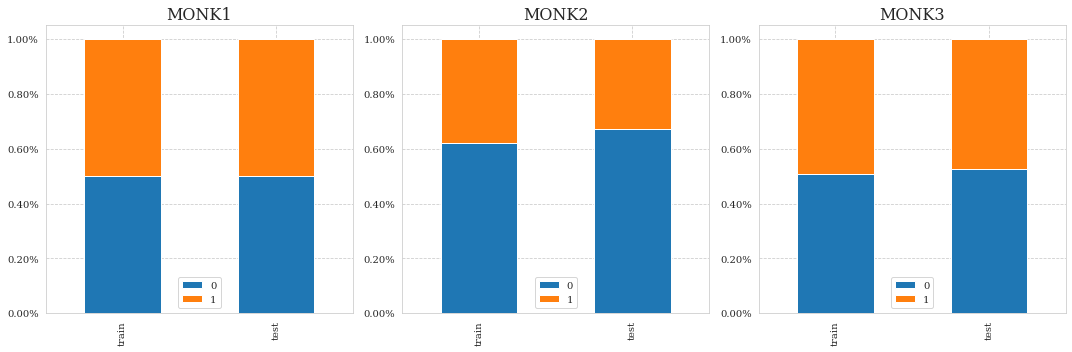

In [ ]:
# checking balancing of data

fig, axs = plt.subplots(1, 3)
ax1 = compute_contingency(TR_MONK1, TS_MONK1).plot(kind="bar", stacked="True",ax=axs[0])
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_title("MONK1")
ax2 = compute_contingency(TR_MONK2, TS_MONK2).plot(kind="bar", stacked="True",ax=axs[1])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title("MONK2")
ax3 = compute_contingency(TR_MONK3, TS_MONK3).plot(kind="bar", stacked="True",ax=axs[2])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.set_title("MONK3")
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
plt.show()

In [ ]:
# X are the values of the attributes for each MONK dataframe, while y corresponds to the class
X_MONK1_train = TR_MONK1.values[:,2:19].astype(np.float32)
y_MONK1_train = TR_MONK1.values[:,0].astype('int')
X_MONK2_train = TR_MONK2.values[:,2:19].astype(np.float32)
y_MONK2_train = TR_MONK2.values[:,0].astype('int') 
X_MONK3_train = TR_MONK3.values[:,2:19].astype(np.float32)
y_MONK3_train = TR_MONK3.values[:,0].astype('int') 

X_MONK1_test = TS_MONK1.values[:,2:19].astype(np.float32)
y_MONK1_test = TS_MONK1.values[:,0].astype('int')
X_MONK2_test = TS_MONK2.values[:,2:19].astype(np.float32)
y_MONK2_test = TS_MONK2.values[:,0].astype('int') 
X_MONK3_test = TS_MONK3.values[:,2:19].astype(np.float32)
y_MONK3_test = TS_MONK3.values[:,0].astype('int')  

# Looking at the shape of each set
print(X_MONK1_train.shape, y_MONK1_train.shape)
print(X_MONK2_train.shape, y_MONK2_train.shape)
print(X_MONK3_train.shape, y_MONK3_train.shape)
print(X_MONK1_test.shape, y_MONK1_test.shape)
print(X_MONK2_test.shape, y_MONK2_test.shape)
print(X_MONK3_test.shape, y_MONK3_test.shape)

(124, 17) (124,)
(169, 17) (169,)
(122, 17) (122,)
(432, 17) (432,)
(432, 17) (432,)
(432, 17) (432,)


In [ ]:
# Initializing values
X1_train, X1_val, y1_train, y1_val = train_test_split(X_MONK1_train, y_MONK1_train, test_size=0.3, shuffle=True, random_state=0)
X1_test = X_MONK1_test.astype(np.float32)
y1_test = y_MONK1_test.astype(np.float32)

X2_train, X2_val, y2_train, y2_val = train_test_split(X_MONK2_train, y_MONK2_train, test_size=0.3, shuffle=True, random_state=0)
X2_test = X_MONK2_test.astype(np.float32)
y2_test = y_MONK2_test.astype(np.float32)

X3_train, X3_val, y3_train, y3_val = train_test_split(X_MONK3_train, y_MONK3_train, test_size=0.3, shuffle=True, random_state=0)
X3_test = X_MONK3_test.astype(np.float32)
y3_test = y_MONK3_test.astype(np.float32)

# **<font color="#34ebdb">2.0 FUNCTIONS</font>**

In [ ]:
# Function to be passed to sklearn's wrapper to build keras model to perform gridsearch
def build_fn(n_hidden_units, learning_rate, momentum, regularizer, lambd): 
    model = Sequential()
    model.add(Dense(n_hidden_units, 
                    activation = "relu", 
                    input_dim = X_MONK1_train.shape[1],
                    kernel_regularizer = regularizer(lambd),
                    kernel_initializer = "random_normal"))
    
    model.add(Dense(1, activation = "sigmoid", kernel_initializer = "random_normal"))

    model.compile(optimizer = SGD(learning_rate = learning_rate, momentum = momentum),
                  loss = "mse",
                  metrics = ["accuracy"])
    return model

In [ ]:
# Function to get predicted labels from probabilistic predictions on test set done by keras model
def get_pred(predictions):
  y_pred = np.zeros(len(predictions))
  
  for i in range(len(predictions)):  
    if predictions[i] > .5:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

  return y_pred

In [ ]:
# Function to fit mlp classifier with partial fit to get scores and loss 
def mlp_fit(mlp, max_iter, monk):
  if monk == 1:
    X_train = X1_train
    y_train = y1_train
    X_val = X1_val
    y_val = y1_val
  elif monk == 2:
    X_train = X2_train
    y_train = y2_train
    X_val = X2_val
    y_val = y2_val
  elif monk == 3:
    X_train = X3_train
    y_train = y3_train
    X_val = X3_val
    y_val = y3_val
  else:
    print('Enter a valid number for MONK')

  train_scores = []
  val_scores = []
  train_loss = []
  val_loss = []

  for i in range(max_iter):
      mlp.partial_fit(X_train, y_train, classes = [0, 1])
      y_pred = mlp.predict(X_train)
      y_pred_val = mlp.predict(X_val)

      train_scores.append(mlp.score(X_train, y_train))
      train_loss.append(log_loss(y_train, y_pred))

      val_scores.append(mlp.score(X_val, y_val))
      val_loss.append(log_loss(y_val, y_pred_val))

  print('Training score:  ', round(mlp.score(X_train, y_train),4))
  print('Validation score:', round(mlp.score(X_val, y_val),4)) 
  print('Training loss:   ', round(train_loss[-1],4))
  print('Validation loss: ', round(val_loss[-1],4), '\n')
  
  return train_scores, train_loss, val_scores, val_loss

In [ ]:
# Function to create score and loss plots
def plot_score_loss(train_scores, val_scores, train_loss, val_loss, save, name):
    plt.figure(figsize = (6, 4))
    plt.plot(train_scores, label='Train')
    plt.plot(val_scores, label='val', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    if save == 1:
        plt.savefig(name+'_acc', dpi=400)
    plt.show()

    plt.figure(figsize = (6, 4))
    plt.plot(train_loss, label='Train')
    plt.plot(val_loss, label='val', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    if save == 1:
        plt.savefig(name+'_loss', dpi=400)
    plt.show()

In [ ]:
# Lists of parameters to compare within the neural network
list_initializers = ['random_normal', 'random_uniform', 'he_normal', 'he_uniform', 'glorot_normal']
list_activation_hidden = ['relu', 'selu', 'sigmoid', 'tanh']
list_optimizers = [Adam, SGD, RMSprop]
list_batch_size = [1, 2, 8, 32, 64, 128]

# Function to build a neural network based on its necessary characteristics
def build_compare(comparison, 
                  part_to_compare, 
                  set_to_use, 
                  monk, 
                  seed, 
                  input_unit, 
                  epochs, 
                  default_batch_size, 
                  default_initializer, 
                  default_kernel_regularizer,
                  default_act_input, 
                  default_act_output, 
                  default_optimizer, 
                  learning_rate):
  
    if set_to_use == 'test':
        if monk == 1:
            X_train = X_MONK1_train
            y_train = y_MONK1_train
            X_test = X1_test
            y_test = y1_test
        elif monk == 2:
            X_train = X_MONK2_train
            y_train = y_MONK2_train
            X_test = X2_test
            y_test = y2_test
        elif monk == 3:
            X_train = X_MONK3_train 
            y_train = y_MONK3_train
            X_test = X3_test
            y_test = y3_test
        else:
            print('Enter a valid number for MONK (1,2,3)')
    elif set_to_use == 'val':
        if monk == 1:
            X_train = X1_train
            y_train = y1_train
            X_test = X1_val
            y_test = y1_val
        elif monk == 2:
            X_train = X2_train
            y_train = y2_train
            X_test = X2_val
            y_test = y2_val
        elif monk == 3:
            X_train = X3_train 
            y_train = y3_train
            X_test = X3_val
            y_test = y3_val
        else:
            print('Enter a valid number for MONK (1,2,3)')
    else:
        print('Enter a valid set (test, val)')

    # Clearing session and assigning new seed before each time the NN is built
    keras.backend.clear_session()
    tf.random.set_seed(seed)
    
    model = Sequential()
    
    # In case no comparison is needed and only several iterations are desired, the model is built and the fuction ends here
    if part_to_compare == "testing":
        model.add(Dense(input_unit, input_dim = X_train.shape[1], kernel_initializer = default_initializer, kernel_regularizer = default_kernel_regularizer, activation = default_act_input))
        model.add(Dense(1, activation = default_act_output))
        model.compile(loss = 'mse', metrics = ['accuracy'], optimizer = default_optimizer)

        model.fit(X_train, y_train,
                  epochs = epochs,
                  batch_size = default_batch_size,
                  verbose = 0)
    
        loss, acc = model.evaluate(X_test, y_test, verbose = 0)
  
        return loss, acc

    # If on the other hand, several parameters are to be compared:
    # Possibilities for the input layer
    if part_to_compare == "initializer":
        model.add(Dense(input_unit, input_dim = X_train.shape[1], kernel_initializer = comparison, kernel_regularizer = default_kernel_regularizer, activation = default_act_input))
    elif part_to_compare == "activation_input":
        model.add(Dense(input_unit, input_dim = X_train.shape[1], kernel_initializer = default_initializer, kernel_regularizer = default_kernel_regularizer, activation = comparison))
    else:
        model.add(Dense(input_unit, input_dim = X_train.shape[1], kernel_initializer = default_initializer, kernel_regularizer = default_kernel_regularizer, activation = default_act_input))

    # Output layer
    model.add(Dense(1, activation = default_act_output))
    
    # Possibilities for compiling 
    if part_to_compare == "optimizer":
        model.compile(loss = 'mse', metrics = ['accuracy'], optimizer = comparison(learning_rate = learning_rate))
    else: 
        model.compile(loss = 'mse', metrics = ['accuracy'], optimizer = default_optimizer)
    
    if part_to_compare == "batch_size":
        model.fit(X_train, y_train,
                  epochs = epochs,
                  batch_size = comparison,
                  verbose = 0)  
    else:
        model.fit(X_train, y_train,
                  epochs = epochs,
                  batch_size = default_batch_size,
                  verbose = 0)
    
    loss, acc = model.evaluate(X_test, y_test, verbose = 0)
    
    return loss, acc

# Function to compare the previously built fuction across different iterations and parameters
def begin_comparison(part_to_compare, 
                     set_to_use, 
                     monk, 
                     iter, 
                     input_unit, 
                     epochs, 
                     default_batch_size, 
                     default_initializer, 
                     default_kernel_regularizer,
                     default_act_input, 
                     default_act_output, 
                     default_optimizer, 
                     learning_rate, 
                     plot):
    # Empty lists/dicts to store scores after evaluation
    losses = []
    accs = []  
    accs_dict = {}
    losses_dict = {}

    print('comparing', part_to_compare, "on MONK", monk, '\n')

    # Assigning the list of parameters to compare based on what has been passed to the fuction
    if part_to_compare == "testing":
        comparison = ["without comparison"]
    elif part_to_compare == "activation_input":
        comparison = list_activation_hidden
    elif part_to_compare == "batch_size":
        comparison = list_batch_size
    elif part_to_compare == "initializer":
        comparison = list_initializers
    elif part_to_compare == "optimizer":
        comparison = list_optimizers
    else:
        comparison = []
        print("Please enter a valid input (activation_input, activation_output, initializer, optimizer, testing)")

    # For loop to iterate over the different parameters to compare
    for index, item in enumerate(comparison):
        print('-----------', part_to_compare, item, '-----------')
        accs.append([])
        losses.append([])  

        # Generating a list of random numbers to be later passed as seeds for tensorflow randomization
        list_seeds = np.random.default_rng().choice(iter*len(comparison)+1, size = iter, replace = False)      
        
        # For loop to build, fit and evaluate a NN for n iterations for each of the items in the comparison list
        for i in range(iter):
            seed = list_seeds[i]

            loss, acc = build_compare(item, 
                                      part_to_compare,
                                      set_to_use, 
                                      monk, 
                                      seed,
                                      input_unit, 
                                      epochs, 
                                      default_batch_size,
                                      default_initializer, 
                                      default_kernel_regularizer,
                                      default_act_input, 
                                      default_act_output, 
                                      default_optimizer, 
                                      learning_rate)
            
            # Storing scores in their respective list
            losses[index].append(round(loss,6))
            accs[index].append(round(acc,6))

            # Storing scores together with the model and seed they belong
            accs_dict[item, str(i), str(seed)] = round(acc,6)
            losses_dict[item, str(i), str(seed)] = round(loss,6)

        print('Percentual error:', round((np.std(accs[index])/np.mean(accs[index]))*100,6))
        print('Avg accuracy:    ', round(np.mean(accs[index]),6))
        print('Acc std dev:     ', round(np.std(accs[index]),6))
        print('Avg loss:        ', round(np.mean(losses[index]),6))
        print('Loss std dev:    ', round(np.std(losses[index]),6), '\n')
    
    # Plotting scores obtained before
    if plot == 1: 
        plot_comparison(part_to_compare, comparison, iter, accs, losses)
        
    return accs_dict, losses_dict   

def plot_comparison(part_to_compare, comparison, iter, accs, losses):
    for index, item in enumerate(comparison):
        print('\n*******************', part_to_compare, item, 'ACCURACY', '*******************\n')
        plt.plot(range(iter), accs[index])
        plt.title('Accuracy')
        plt.xlabel('iteration')
        plt.ylabel('acc')
        plt.show()
        print('\n*******************', part_to_compare, item, 'LOSS', '*******************\n')
        plt.plot(range(iter), losses[index])
        plt.title('Loss')
        plt.xlabel('iteration')
        plt.ylabel('loss')
        plt.show()
        print('\n')

In [ ]:
# Function to apply nested cross validation on a series of models and parameters
def nested_cross_validation(monk, folds, model_to_use, model_params, param_grid):
    outer_kfold = KFold(folds, shuffle=True, random_state=42)
    inner_kfold = KFold(folds, shuffle=True, random_state=77) 

    test_scores = []

    if monk == 1:
        X = X_MONK1_train
        y = y_MONK1_train
    elif monk == 2:
        X = X_MONK2_train
        y = y_MONK2_train
    elif monk == 3:
        X = X_MONK3_train
        y = y_MONK3_train
    else:
        print("Please type a valid input (1,2,3)")

    # Outer K-Fold (Evaluation)
    for train_indices, test_indices in outer_kfold.split(X, y):
        # Split data into train and test
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        
        models = {}

        # Initializing param_grid
        list_params = ['param'+str(i) for i in range(len(model_params))]
        for list_params[0] in param_grid[0]:
            for list_params[1] in param_grid[1]:
                for list_params[2] in param_grid[2]:

                    val_scores = []

                    # Inner K-Fold for each hyper-parameter configuration
                    for selection_indices, val_indices in inner_kfold.split(X_train, y_train):

                        # Split data into selection and validation
                        X_selection, y_selection = X_train[selection_indices], y_train[selection_indices]
                        X_val, y_val = X_train[val_indices], y_train[val_indices]

                        # Fit the model
                        # for i in range(len(model_params)):
                        params = {model_params[i]: list_params[i] for i in range(len(model_params))}
                        model = model_to_use(**params)
                        model.fit(X_selection, y_selection)
                        val_scores.append(model.score(X_val, y_val))
                    
                    # Validation score of a model is the mean over the inner k-folds
                    models[(list_params[0], list_params[1], list_params[2])] = np.mean(val_scores)
                    # models[(list_params)] = np.mean(val_scores)  
                    # models = {key: None for key in keyList}
                    # models = {(list_params[i]): np.mean(val_scores) for i in range(len(model_params))}
                    # models[(list_params[i] for i in range(len(model_params)))] = np.mean(val_scores) 

        best_params = max(models, key=models.get)
        
        best_params_dict = {model_params[i]: best_params[i] for i in range(len(model_params))}
        model = model_to_use(**best_params_dict)
        model.fit(X_train, y_train)
        test_scores.append(model.score(X_test, y_test))

    avg_accuracy = round(np.mean(test_scores), 4)
    std_dev = round(np.std(test_scores), 4)

    return avg_accuracy, std_dev

In [ ]:
# Function to fit mlp classifier with partial fit to get scores and loss 
def mlp_final_test(mlp, epochs, monk):
  if monk == 1:
    X_train = X1_train
    y_train = y1_train
    X_val = X1_val
    y_val = y1_val
    X_test = X1_test
    y_test = y1_test
  elif monk == 2:
    X_train = X2_train
    y_train = y2_train
    X_val = X2_val
    y_val = y2_val
    X_test = X2_test
    y_test = y2_test
  elif monk == 3:
    X_train = X3_train
    y_train = y3_train
    X_val = X3_val
    y_val = y3_val
    X_test = X3_test
    y_test = y3_test
  else:
    print('Enter a valid number for MONK')

  train_loss = []
  val_loss = []
  test_loss = []

  for i in range(epochs):
      mlp.partial_fit(X_train, y_train, classes = [0, 1])
      y_pred = mlp.predict(X_train)
      y_pred_val = mlp.predict(X_val)
      y_pred_test = mlp.predict(X_test)

      train_loss.append(log_loss(y_train, y_pred))
      val_loss.append(log_loss(y_val, y_pred_val))
      test_loss.append(log_loss(y_test, y_pred_test))

  tr_acc = mlp.score(X_train, y_train)
  vl_acc = mlp.score(X_val, y_val)
  ts_acc = mlp.score(X_test, y_test)

  tr_loss = train_loss[-1]
  vl_loss = val_loss[-1]
  ts_loss = test_loss[-1]
  
  return tr_acc, vl_acc, ts_acc, tr_loss, vl_loss, ts_loss

# **<font color="#34ebdb">3.0 MONK 1</font>**

## **<font color="#CEFF5E">KERAS</font>**

In [ ]:
model_search = KerasClassifier(build_fn, n_hidden_units=0, learning_rate=0, regularizer=L2, lambd=0, batch_size=0, momentum=0, epochs=50, random_state=42, verbose=0)

param_grid = {'n_hidden_units': [2, 4, 6],
              'learning_rate': [.01, .1, 1],
              'momentum': [0, .01, .1],
              'lambd': [0, .01, .1],
              'batch_size': [2, 8, 32]
              }

search_loss = GridSearchCV(model_search, 
                           param_grid, 
                           cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                           verbose = 0,
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error').fit(X_MONK1_train, y_MONK1_train, verbose=0)

print('Best score:', search_loss.best_score_, '\nBest params', search_loss.best_params_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: -0.024 
Best params {'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 4}


In [ ]:
scores_loss = search_loss.cv_results_['mean_test_score']
params_loss = search_loss.cv_results_['params']

grid_dict_loss = {}
for score, param in zip(scores_loss, params_loss):
    grid_dict_loss[str(param)] = score

optimal_model_loss = [(key, value) for key, value in grid_dict_loss.items() if value > -.05]
for opt_model in optimal_model_loss:
  print(opt_model)

("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0, 'n_hidden_units': 4}", -0.04)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 4}", -0.024)


In [ ]:
model_search = KerasClassifier(build_fn, n_hidden_units=0, learning_rate=0, regularizer=L2, lambd=0, batch_size=0, momentum=0, epochs=50, random_state=42, verbose=0)

param_grid = {'n_hidden_units': [4, 5, 6, 7],
              'learning_rate': [.1, .5, 1],
              'momentum': [0, .01, .1],
              'lambd': [0],
              'batch_size': [2, 8]
              }

search_loss = GridSearchCV(model_search, 
                           param_grid, 
                           cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                           verbose = 0,
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error').fit(X_MONK1_train, y_MONK1_train, verbose=0)

print('Best score:', search_loss.best_score_, '\nBest params', search_loss.best_params_)

Best score: -0.008 
Best params {'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 5}


In [ ]:
scores_loss = search_loss.cv_results_['mean_test_score']
params_loss = search_loss.cv_results_['params']

grid_dict_loss = {}
for score, param in zip(scores_loss, params_loss):
    grid_dict_loss[str(param)] = score

optimal_model_loss = [(key, value) for key, value in grid_dict_loss.items() if value > -.05]
for opt_model in optimal_model_loss:
  print(opt_model)

("{'batch_size': 2, 'lambd': 0, 'learning_rate': 0.5, 'momentum': 0, 'n_hidden_units': 5}", -0.03233333333333333)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 0.5, 'momentum': 0.1, 'n_hidden_units': 4}", -0.048)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 0.5, 'momentum': 0.1, 'n_hidden_units': 5}", -0.041)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 0.5, 'momentum': 0.01, 'n_hidden_units': 5}", -0.03233333333333333)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0, 'n_hidden_units': 4}", -0.04)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 4}", -0.024)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 5}", -0.008)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.01, 'n_hidden_units': 5}", -0.025)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Training accuracy:   1.0
Training loss:       0.0008
Validation accuracy: 1.0
Validation loss:     0.0043


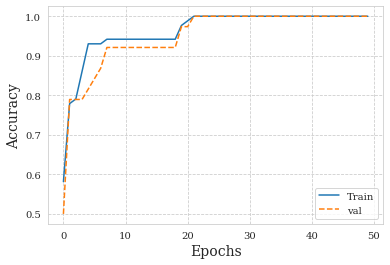

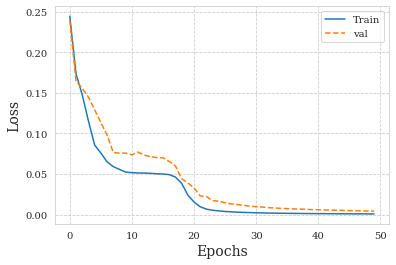

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK1_train.shape[1], activation="relu", kernel_regularizer=L2(0)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.5, momentum=.1), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X1_train, y1_train, epochs=50, batch_size=2, validation_data=(X1_val, y1_val), verbose=0)

loss, acc = model.evaluate(X1_train, y1_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X1_val, y1_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 0,
                name = '')

## **<font color="#CEFF5E">KERAS: COMPARING PARAMETERS</font>**

In [ ]:
accs_dict, losses_dict = begin_comparison("optimizer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 2,
                                          default_initializer = 'glorot_normal', 
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(),
                                          default_kernel_regularizer=L2(0),
                                          learning_rate = .01,
                                          plot = 0)

comparing optimizer on MONK 1 

----------- optimizer <class 'keras.optimizers.optimizer_v2.adam.Adam'> -----------
Percentual error: 6.613058
Avg accuracy:     0.950526
Acc std dev:      0.062859
Avg loss:         0.039368
Loss std dev:     0.041284 

----------- optimizer <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'> -----------
Percentual error: 12.047603
Avg accuracy:     0.676842
Acc std dev:      0.081543
Avg loss:         0.21486
Loss std dev:     0.019756 

----------- optimizer <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'> -----------
Percentual error: 5.624251
Avg accuracy:     0.96
Acc std dev:      0.053993
Avg loss:         0.029781
Loss std dev:     0.03762 



In [ ]:
accs_dict, losses_dict = begin_comparison("initializer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 2,
                                          default_initializer = 'glorot_normal', 
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = Adam(learning_rate = .01),
                                          default_kernel_regularizer=L2(0),
                                          learning_rate = .01,
                                          plot = 0)

comparing initializer on MONK 1 

----------- initializer random_normal -----------


Percentual error: 14.210544
Avg accuracy:     0.83
Acc std dev:      0.117948
Avg loss:         0.125415
Loss std dev:     0.087476 

----------- initializer random_uniform -----------
Percentual error: 16.803727
Avg accuracy:     0.822632
Acc std dev:      0.138233
Avg loss:         0.125169
Loss std dev:     0.084641 

----------- initializer he_normal -----------
Percentual error: 10.543608
Avg accuracy:     0.896316
Acc std dev:      0.094504
Avg loss:         0.078417
Loss std dev:     0.066297 

----------- initializer he_uniform -----------
Percentual error: 11.576695
Avg accuracy:     0.885789
Acc std dev:      0.102545
Avg loss:         0.081756
Loss std dev:     0.072105 

----------- initializer glorot_normal -----------
Percentual error: 12.994538
Avg accuracy:     0.894737
Acc std dev:      0.116267
Avg loss:         0.079261
Loss std dev:     0.080046 



In [ ]:
accs_dict, losses_dict = begin_comparison("activation_input", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 2,
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = Adam(learning_rate = .01),
                                          default_kernel_regularizer=L2(0),
                                          learning_rate = .01,
                                          plot = 0)

comparing activation_input on MONK 1 

----------- activation_input relu -----------
Percentual error: 10.07538
Avg accuracy:     0.896316
Acc std dev:      0.090307
Avg loss:         0.080784
Loss std dev:     0.067719 

----------- activation_input selu -----------
Percentual error: 9.451697
Avg accuracy:     0.906842
Acc std dev:      0.085712
Avg loss:         0.076901
Loss std dev:     0.059487 

----------- activation_input sigmoid -----------
Percentual error: 6.373382
Avg accuracy:     0.892631
Acc std dev:      0.056891
Avg loss:         0.08222
Loss std dev:     0.034808 

----------- activation_input tanh -----------
Percentual error: 8.636126
Avg accuracy:     0.926842
Acc std dev:      0.080043
Avg loss:         0.056743
Loss std dev:     0.058808 



In [ ]:
accs_dict, losses_dict = begin_comparison("batch_size", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 2,
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'tanh', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = Adam(learning_rate = .01),
                                          default_kernel_regularizer=L2(0),
                                          learning_rate = .01,
                                          plot = 0)

comparing batch_size on MONK 1 

----------- batch_size 1 -----------
Percentual error: 6.284298
Avg accuracy:     0.95421
Acc std dev:      0.059965
Avg loss:         0.035569
Loss std dev:     0.042875 

----------- batch_size 2 -----------
Percentual error: 7.918496
Avg accuracy:     0.937368
Acc std dev:      0.074225
Avg loss:         0.047425
Loss std dev:     0.050414 

----------- batch_size 8 -----------
Percentual error: 8.097653
Avg accuracy:     0.928421
Acc std dev:      0.07518
Avg loss:         0.057223
Loss std dev:     0.0474 

----------- batch_size 32 -----------
Percentual error: 9.861866
Avg accuracy:     0.873684
Acc std dev:      0.086162
Avg loss:         0.092239
Loss std dev:     0.052319 

----------- batch_size 64 -----------
Percentual error: 11.533581
Avg accuracy:     0.84
Acc std dev:      0.096882
Avg loss:         0.116028
Loss std dev:     0.061205 

----------- batch_size 128 -----------
Percentual error: 7.920108
Avg accuracy:     0.827895
Acc std d

In [ ]:
for i in [.005, .01, .05, .1]:
    print('lr =', i)
    accs_dict, losses_dict = begin_comparison("testing",  
                                              iter = 30, 
                                              set_to_use = 'val',
                                              monk = 1,
                                              epochs = 50, 
                                              input_unit = 5, 
                                              default_batch_size = 1,
                                              default_initializer = 'he_normal', 
                                              default_act_input = 'tanh', 
                                              default_act_output = 'sigmoid', 
                                              default_optimizer = Adam(learning_rate = i),
                                              default_kernel_regularizer=L2(0),
                                              learning_rate = .01,
                                              plot = 0)

lr = 0.005
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 6.803845
Avg accuracy:     0.938596
Acc std dev:      0.063861
Avg loss:         0.048397
Loss std dev:     0.042459 

lr = 0.01
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 5.659728
Avg accuracy:     0.950877
Acc std dev:      0.053817
Avg loss:         0.041161
Loss std dev:     0.037893 

lr = 0.05
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 8.356654
Avg accuracy:     0.831579
Acc std dev:      0.069492
Avg loss:         0.129611
Loss std dev:     0.053745 

lr = 0.1
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 15.710766
Avg accuracy:     0.671053
Acc std dev:      0.105428
Avg loss:         0.314414
Loss std dev:     0.109229 



In [ ]:
for i in [.008, .009, .02, .03]:
    print('lr =', i)
    accs_dict, losses_dict = begin_comparison("testing",  
                                              iter = 30, 
                                              set_to_use = 'val',
                                              monk = 1,
                                              epochs = 50, 
                                              input_unit = 5, 
                                              default_batch_size = 1,
                                              default_initializer = 'he_normal', 
                                              default_act_input = 'tanh', 
                                              default_act_output = 'sigmoid', 
                                              default_optimizer = Adam(learning_rate = i),
                                              default_kernel_regularizer=L2(0),
                                              learning_rate = .01,
                                              plot = 0)

lr = 0.008
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 6.153875
Avg accuracy:     0.946491
Acc std dev:      0.058246
Avg loss:         0.040804
Loss std dev:     0.036292 

lr = 0.009
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 5.825966
Avg accuracy:     0.95
Acc std dev:      0.055347
Avg loss:         0.039624
Loss std dev:     0.041821 

lr = 0.02
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 8.160582
Avg accuracy:     0.936842
Acc std dev:      0.076452
Avg loss:         0.049971
Loss std dev:     0.056615 

lr = 0.03
comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 8.426511
Avg accuracy:     0.885088
Acc std dev:      0.074582
Avg loss:         0.090078
Loss std dev:     0.059443 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 90        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
Training accuracy:   1.0
Training loss:       0.0001
Validation accuracy: 1.0
Validation loss:     0.0009


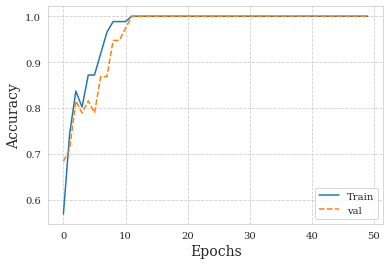

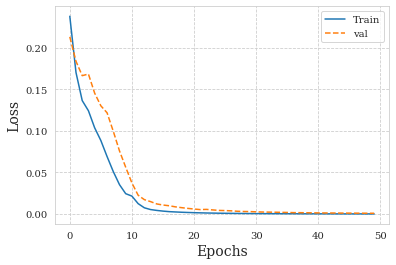

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(45)

model = Sequential()
model.add(Dense(5, input_dim = X_MONK1_train.shape[1], kernel_initializer = 'he_normal', activation="tanh", kernel_regularizer=L2(0)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=.02), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X1_train, y1_train, epochs=50, batch_size=1, validation_data=(X1_val, y1_val), verbose=0)

loss, acc = model.evaluate(X1_train, y1_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X1_val, y1_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 1,
                name = 'MONK1_final')

In [ ]:
# iterating for getting avg TR accuracy and loss

train_accs = []
train_losses = []

count = 0
list_seeds = np.random.default_rng().choice(50, size = 50, replace = False)      
for i in range(50):
    print(f"Processing {i + 1}/50")
    seed = list_seeds[i]
    keras.backend.clear_session()
    tf.random.set_seed(seed)

    model = Sequential()
    model.add(Dense(5, input_dim = X_MONK1_train.shape[1], kernel_initializer = 'he_normal', activation="tanh", kernel_regularizer=L2(0)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=.02), loss='mse', metrics='accuracy')

    history = model.fit(X1_train, y1_train, epochs=50, batch_size=1, validation_data=(X1_val, y1_val), verbose=0)
    loss, acc = model.evaluate(X1_train, y1_train, verbose = 0)
    train_accs.append(acc)
    train_losses.append(loss)

print("Avg TR Accuracy:", np.mean(train_accs))
print("Std TR Accuracy:", np.std(train_accs))
print("Avg TR Loss:", np.mean(train_losses))
print("Std TR Loss:", np.std(train_losses))

Processing 1/50
Processing 2/50
Processing 3/50
Processing 4/50
Processing 5/50
Processing 6/50
Processing 7/50
Processing 8/50
Processing 9/50
Processing 10/50
Processing 11/50
Processing 12/50
Processing 13/50
Processing 14/50
Processing 15/50
Processing 16/50
Processing 17/50
Processing 18/50
Processing 19/50
Processing 20/50
Processing 21/50
Processing 22/50
Processing 23/50
Processing 24/50
Processing 25/50
Processing 26/50
Processing 27/50
Processing 28/50
Processing 29/50
Processing 30/50
Processing 31/50
Processing 32/50
Processing 33/50
Processing 34/50
Processing 35/50
Processing 36/50
Processing 37/50
Processing 38/50
Processing 39/50
Processing 40/50
Processing 41/50
Processing 42/50
Processing 43/50
Processing 44/50
Processing 45/50
Processing 46/50
Processing 47/50
Processing 48/50
Processing 49/50
Processing 50/50
Avg TR Accuracy: 0.9995348834991455
Std TR Accuracy: 0.003255815505981445
Avg TR Loss: 0.0007089559722226113
Std TR Loss: 0.002533662885818359


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    model = Sequential()
    model.add(Dense(5, input_dim = X_MONK1_train.shape[1], kernel_initializer = 'he_normal', activation="tanh", kernel_regularizer=L2(0)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=.02), loss='mse', metrics='accuracy')
    model.fit(X_MONK1_train, y_MONK1_train)

    y_pred = model.predict(X_MONK1_test)

    acc = accuracy_score(y_MONK1_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK1_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 1.267594
Avg accuracy:     0.996806
Acc std dev:      0.012635
Avg loss:         0.003128
Loss std dev:     0.010168 


******************* testing without comparison ACCURACY *******************



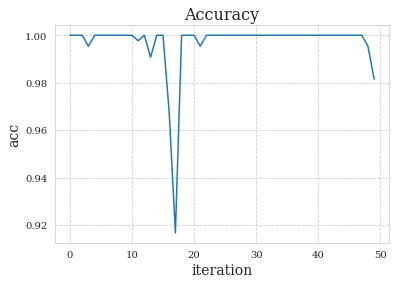


******************* testing without comparison LOSS *******************



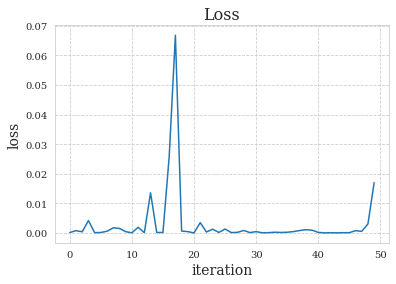

In [ ]:
accs_dict, losses_dict = begin_comparison("testing", 
                                          iter = 50, 
                                          set_to_use = 'test',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 1,
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'tanh', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = Adam(learning_rate=.02),
                                          default_kernel_regularizer = L2(0),
                                          learning_rate = 1,
                                          plot = 1)

comparing testing on MONK 1 

----------- testing without comparison -----------
Percentual error: 1.690513
Avg accuracy:     0.995509
Acc std dev:      0.016829
Avg loss:         0.004137
Loss std dev:     0.013282 


******************* testing without comparison ACCURACY *******************



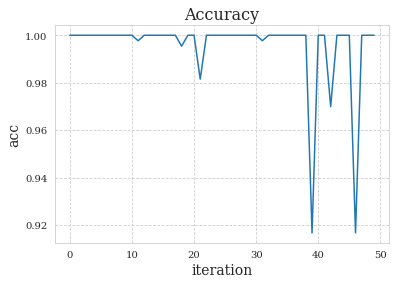


******************* testing without comparison LOSS *******************



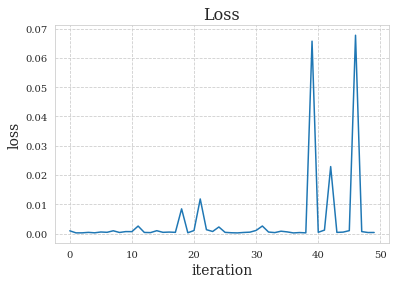

In [ ]:
accs_dict, losses_dict = begin_comparison("testing", 
                                          iter = 50, 
                                          set_to_use = 'test',
                                          monk = 1,
                                          epochs = 50, 
                                          input_unit = 5, 
                                          default_batch_size = 1,
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'tanh', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = Adam(learning_rate=.01),
                                          default_kernel_regularizer = L2(0),
                                          learning_rate = 1,
                                          plot = 1)

## **<font color="#CEFF5E">SCIKITLEARN'S MLP</font>**

In [ ]:
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam", 
        "learning_rate_init": 0.02
    },
]

labels = [
    "constant learning w/o momentum",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning w/o momentum",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adaptive learning w/o momentum",
    "adaptive with momentum",
    "adaptive with Nesterov's momentum",
    "adam",
]

In [ ]:
# def plot_on_dataset(X, y, ax, name):
models = []
for label, param in zip(labels, params):
    print("training", label)
    mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(6,), **param)

    # some parameter combinations will not converge so they are ignored here
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      mlp.fit(X1_train, y1_train)

    models.append(mlp)
    print("Score: %f" % mlp.score(X1_val, y1_val))
    print("Loss: %f" % mlp.loss_,'\n')

training constant learning w/o momentum
Score: 0.736842
Loss: 0.083149 

training constant with momentum
Score: 0.842105
Loss: 0.009624 

training constant with Nesterov's momentum
Score: 0.842105
Loss: 0.010426 

training inv-scaling learning w/o momentum
Score: 0.552632
Loss: 0.654655 

training inv-scaling with momentum
Score: 0.684211
Loss: 0.429510 

training inv-scaling with Nesterov's momentum
Score: 0.684211
Loss: 0.429070 

training adaptive learning w/o momentum
Score: 0.736842
Loss: 0.083149 

training adaptive with momentum
Score: 0.842105
Loss: 0.008862 

training adaptive with Nesterov's momentum
Score: 0.842105
Loss: 0.009542 

training adam
Score: 0.815789
Loss: 0.007564 



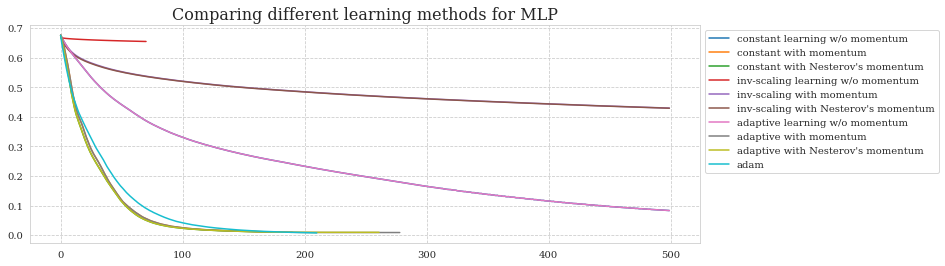

In [ ]:
plt.figure(figsize=(12,4))
for i, label in zip(range(len(models)), labels):
  plt.plot(models[i].loss_curve_, label = label)
plt.title("Comparing different learning methods for MLP")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

In [ ]:
# Gridsearch to find optimal values for neural network
model = MLPClassifier(solver = 'sgd', 
                      learning_rate= 'adaptive',
                      nesterovs_momentum = True,
                      learning_rate_init = 0.2,
                      max_iter = 50, 
                      random_state = 42)

param_grid = {'hidden_layer_sizes': [(2,), (4,), (6,)],
              'momentum': [0, .001, .01, .1], 
              'learning_rate_init': [.001, .01, 1],
              'batch_size': [1, 2, 8, 32],
              }

with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      search = GridSearchCV(model, 
                            param_grid, 
                            cv = StratifiedKFold(5, shuffle = True, random_state = 42), 
                            verbose = 1).fit(X_MONK1_train, y_MONK1_train)
        
print('Best score:', search.best_score_)
print('Best params', search.best_estimator_) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best score: 0.992
Best params MLPClassifier(batch_size=8, hidden_layer_sizes=(6,), learning_rate='adaptive',
              learning_rate_init=1, max_iter=50, momentum=0, random_state=42,
              solver='sgd')


Training score:   1.0
Validation score: 0.9737
Training loss:    0.0
Validation loss:  0.9089 



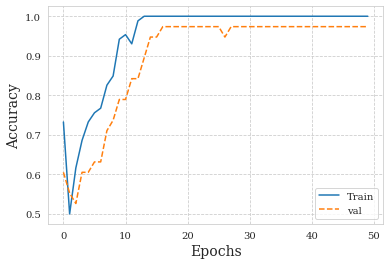

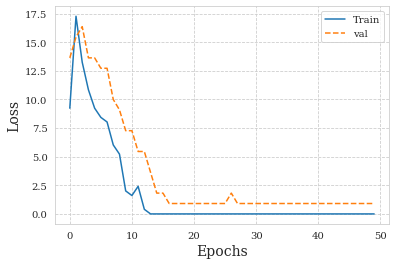

In [ ]:
# Visualizing training curves for model found in gridsearch
mlp = MLPClassifier(solver = 'sgd', 
                    learning_rate = 'adaptive',
                    nesterovs_momentum = True,
                    max_iter = 50,
                    batch_size=8, 
                    hidden_layer_sizes=(6,), 
                    learning_rate_init=1,
                    momentum=0.1,
                    random_state=42)

train_scores, train_loss, val_scores, val_loss = mlp_fit(mlp, max_iter = 50, monk=1)

plot_score_loss(train_scores = train_scores, 
                val_scores = val_scores, 
                train_loss = train_loss,
                val_loss = val_loss,
                save = 1,
                name = 'MONK1_sklearn')

In [ ]:
iterations = 50
list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

train_acc = []
val_acc = []
test_acc = []

train_loss = []
val_loss = []
test_loss = []

for i in list_seeds:
    tr_acc, vl_acc, ts_acc, tr_loss, vl_loss, ts_loss = mlp_final_test(mlp=MLPClassifier(solver = 'sgd', 
                                                                                         learning_rate = 'adaptive',
                                                                                         nesterovs_momentum = True,
                                                                                         max_iter = 50,
                                                                                         batch_size=8, 
                                                                                         hidden_layer_sizes=(6,), 
                                                                                         learning_rate_init=1,
                                                                                         momentum=0.1,
                                                                                         random_state=i), epochs=50, monk=1)
    train_acc.append(tr_acc)
    val_acc.append(vl_acc)
    test_acc.append(ts_acc)

    train_loss.append(tr_loss)
    val_loss.append(vl_loss)
    test_loss.append(ts_loss)

print('Avg train acc: ', round(np.mean(train_acc),4))
print('Std dev:       ', round(np.std(train_acc),4))
print('Avg val acc:   ', round(np.mean(val_acc),4))
print('Std dev:       ', round(np.std(val_acc),4))
print('Avg test acc:  ', round(np.mean(test_acc),4))
print('Std dev:       ', round(np.std(test_acc),4))

print('Avg train loss:', round(np.mean(train_loss),4))
print('Std dev:       ', round(np.std(train_loss),4))
print('Avg val loss:  ', round(np.mean(val_loss),4))
print('Std dev:       ', round(np.std(val_loss),4))
print('Avg test loss: ', round(np.mean(test_loss),4))
print('Std dev:       ', round(np.std(test_loss),4))

Avg train acc:  0.994
Std dev:        0.0237
Avg val acc:    0.9568
Std dev:        0.0719
Avg test acc:   0.9478
Std dev:        0.0535
Avg train loss: 0.2088
Std dev:        0.8201
Avg val loss:   1.4906
Std dev:        2.4843
Avg test loss:  1.8021
Std dev:        1.847


## **<font color="#CEFF5E">NESTED CROSS VALIDATION</font>**

In [ ]:
# Models, parameters and hyperparameters to test with nested cross validation for MONK 1
knn_params = ['n_neighbors', 'weights', 'metric']
knn_param_grid = [range(2,78,2), ["uniform", "distance"], ["euclidean", "cityblock", "chebyshev"]]

dt_params = ['criterion', 'max_depth', 'min_samples_split']
dt_param_grid = [['gini', 'entropy'], [1, 2, 4, 6, 8, 10, None], [2, 3, 4, 5, 6, 7, 8]]

lr_params = ['solver', 'C', 'max_iter']
lr_param_grid = [['saga', 'lbfgs'], [.0001, .001, .1, 1, 10, 100, 1000], [500, 1000]]

rf_params = ['criterion', 'max_depth', 'n_estimators']
rf_param_grid = [['gini', 'entropy'], [1, 3, 5, 7, 10, None], [50, 100, 150, 200]]

bnb_params = ['alpha', 'binarize', 'fit_prior']
bnb_param_grid = [[.0001, .001, .01, .1, 1], [0], [True, False]]

gb_params = ['criterion', 'learning_rate', 'n_estimators']
gb_param_grid = [['friedman_mse', 'squared_error'], [.001, .01, .1, 1], [50, 100, 150, 200]]

svc_params = ['C', 'kernel', 'gamma']
svc_param_grid = [[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], 
                  ['poly', 'rbf', 'sigmoid'], 
                  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5]]

nested_dict = {
    'K-Nearest Neighbors': [KNeighborsClassifier, knn_params, knn_param_grid],
    'Decision Tree': [DecisionTreeClassifier, dt_params, dt_param_grid],
    'Logistic Regression': [LogisticRegression, lr_params, lr_param_grid],
    'Random Forests': [RandomForestClassifier, rf_params, rf_param_grid],
    'Bernoulli Naive Bayes': [BernoulliNB, bnb_params, bnb_param_grid],
    'Gradient Boosting': [GradientBoostingClassifier, gb_params, gb_param_grid],
    'Support Vector Machine': [SVC, svc_params, svc_param_grid]}

In [ ]:
monk = 1 # MONK set to use
print('MONK', monk, 'Nested Cross Validation results:\n')

# Ignoring convergence warning for logistic regression when max_iter is not enough to converge
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for name, [model_to_use, model_params, param_grid] in nested_dict.items():
        avg_acc, std_dev = nested_cross_validation(monk = monk, 
                                                   folds = 5,
                                                   model_to_use = model_to_use,
                                                   model_params = model_params,
                                                   param_grid = param_grid)
        print('------', name, '------')
        print('Average accuracy:  ', avg_acc)
        print('Standard deviation:', std_dev, '\n')

MONK 1 Nested Cross Validation results:

------ K-Nearest Neighbors ------
Average accuracy:   0.7503
Standard deviation: 0.0845 

------ Decision Tree ------
Average accuracy:   0.8547
Standard deviation: 0.0603 

------ Logistic Regression ------
Average accuracy:   0.718
Standard deviation: 0.0421 

------ Random Forests ------
Average accuracy:   0.878
Standard deviation: 0.0749 

------ Bernoulli Naive Bayes ------
Average accuracy:   0.7337
Standard deviation: 0.0335 

------ Gradient Boosting ------
Average accuracy:   1.0
Standard deviation: 0.0 

------ Support Vector Machine ------
Average accuracy:   0.9833
Standard deviation: 0.0333 



### **<font color="#CEFF5E">SVM</font>**

GridSearch 1st run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default: auto
    }

svc_param_grid_linear = {
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Grid search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK1_train, y_MONK1_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 2nd run

In [ ]:
model_svc = SVC()

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.5, .6, .7, .8, .9, 1, 2, 3, 4, 5], #default=1.0
    }

models_params = {'SVMlinear': [model_svc, svc_param_grid_linear]}

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Grid search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK1_train, y_MONK1_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 3rd run

In [ ]:
model_svc = SVC()

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.65, .66, .67, .68, .69, .70, .71, .72, .73, .74, .75], #default=1.0
    }

models_params = {'SVMlinear': [model_svc, svc_param_grid_linear]}

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Grid search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK1_train, y_MONK1_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

In [ ]:
# Testing best parameters (svc linear) on validation set
svc = SVC(C=0.66, class_weight='balanced', kernel='linear') 
svc.fit(X1_train, y1_train)

y_pred = svc.predict(X1_val)
print(classification_report(y1_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.7500    0.8333    0.7895        18
           1     0.8333    0.7500    0.7895        20

    accuracy                         0.7895        38
   macro avg     0.7917    0.7917    0.7895        38
weighted avg     0.7939    0.7895    0.7895        38

AUC: 0.7917


In [ ]:
# Testing best parameters on validation set
svc = SVC(C=10.0, class_weight='balanced', gamma=0.1)
svc.fit(X1_train, y1_train)

y_pred = svc.predict(X1_val)
print(classification_report(y1_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.8571    1.0000    0.9231        18
           1     1.0000    0.8500    0.9189        20

    accuracy                         0.9211        38
   macro avg     0.9286    0.9250    0.9210        38
weighted avg     0.9323    0.9211    0.9209        38

AUC: 0.925


In [ ]:
# Testing best parameters on validation set
svc = SVC(C=10.0, class_weight='balanced', gamma=0.1)
svc.fit(X_MONK1_train, y_MONK1_train)

y_pred = svc.predict(X1_test)
print(classification_report(y1_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       216
         1.0     1.0000    1.0000    1.0000       216

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432

AUC: 1.0


### **<font color="#CEFF5E">GRADIENT BOOSTING</font>**

In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [0.001, 0.01, 0.1, 1.],
              'n_estimators':[50, 100, 200]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK1_train, y_MONK1_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
1.0 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
# Testing on validation set
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=.1, criterion='friedman_mse')
gbc.fit(X1_train, y1_train)

y_pred = gbc.predict(X1_val)

print(classification_report(y1_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        18
           1     1.0000    1.0000    1.0000        20

    accuracy                         1.0000        38
   macro avg     1.0000    1.0000    1.0000        38
weighted avg     1.0000    1.0000    1.0000        38

AUC: 1.0


In [ ]:
# Testing on test set
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=.1, criterion='friedman_mse')
gbc.fit(X_MONK1_train, y_MONK1_train)

y_pred = gbc.predict(X1_test)

print(classification_report(y1_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y_MONK1_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       216
         1.0     1.0000    1.0000    1.0000       216

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432

AUC: 1.0


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate = .1, criterion = 'friedman_mse', random_state = i)
    gbc.fit(X_MONK1_train, y_MONK1_train)

    y_pred = gbc.predict(X_MONK1_test)

    acc = accuracy_score(y_MONK1_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK1_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

Avg Accuracy:   1.0
std dev:        0.0
AUC:            1.0
std dev:        0.0


### **<font color="#CEFF5E">RANDOM FOREST</font>**

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 7, 10, None],
              'n_estimators': [50, 100, 150, 200]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK1_train, y_MONK1_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8866666666666667 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [6, 8, 10, 12, 14, 16, None],
              'n_estimators': [20, 30, 40, 50]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK1_train, y_MONK1_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
0.9109999999999999 {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 30}


In [ ]:
# Testing on validation set
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 30, max_depth = 6)
rf.fit(X1_train, y1_train)

y_pred = rf.predict(X1_val)

print(classification_report(y1_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.7826    1.0000    0.8780        18
           1     1.0000    0.7500    0.8571        20

    accuracy                         0.8684        38
   macro avg     0.8913    0.8750    0.8676        38
weighted avg     0.8970    0.8684    0.8670        38

AUC: 0.875


In [ ]:
# Testing on test set
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 30, max_depth = 6)
rf.fit(X_MONK1_train, y_MONK1_train)

y_pred = rf.predict(X1_test)

print(classification_report(y1_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y1_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     0.9857    0.9583    0.9718       216
         1.0     0.9595    0.9861    0.9726       216

    accuracy                         0.9722       432
   macro avg     0.9726    0.9722    0.9722       432
weighted avg     0.9726    0.9722    0.9722       432

AUC: 0.9722


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    rf = RandomForestClassifier(criterion = 'gini', n_estimators = 30, max_depth = 6, random_state = i)
    rf.fit(X_MONK1_train, y_MONK1_train)

    y_pred = rf.predict(X_MONK1_test)

    acc = accuracy_score(y_MONK1_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK1_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

Avg Accuracy:   0.93083333
std dev:        0.02512247
AUC:            0.93083333
std dev:        0.02512247


# **<font color="#34ebdb">4.0 MONK 2</font>**

## **<font color="#CEFF5E">KERAS</font>**

In [ ]:
# First Grid Search

model_search = KerasClassifier(build_fn, 
                               n_hidden_units=0, 
                               learning_rate=0, 
                               regularizer=L2, 
                               lambd=0, 
                               batch_size=0, 
                               momentum=0, 
                               epochs=50, 
                               random_state=42, 
                               verbose=1)

param_grid = {'n_hidden_units': [2, 3, 4],
              'learning_rate': [.01, .1, 1],
              'momentum': [0, .01, .1],
              'lambd': [0, .01, .1],
              'batch_size': [2, 8, 32]
              }

search_loss = GridSearchCV(model_search, 
                           param_grid, 
                           cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                           verbose = 1,
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error').fit(X_MONK2_train, y_MONK2_train, verbose=0)

print('Best score:', search_loss.best_score_, '\nBest params', search_loss.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: 0.0 
Best params {'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0, 'n_hidden_units': 3}


In [ ]:
# Checking all the optimal models

scores_loss = search_loss.cv_results_['mean_test_score']
params_loss = search_loss.cv_results_['params']

grid_dict_loss = {}
for score, param in zip(scores_loss, params_loss):
    grid_dict_loss[str(param)] = score

optimal_model_loss = [(key, value) for key, value in grid_dict_loss.items() if value == 0]
for opt_model in optimal_model_loss:
  print(opt_model)

("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0, 'n_hidden_units': 3}", 0.0)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.01, 'n_hidden_units': 3}", 0.0)
("{'batch_size': 2, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 3}", 0.0)
("{'batch_size': 8, 'lambd': 0, 'learning_rate': 1, 'momentum': 0, 'n_hidden_units': 3}", 0.0)
("{'batch_size': 8, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.01, 'n_hidden_units': 3}", 0.0)
("{'batch_size': 8, 'lambd': 0, 'learning_rate': 1, 'momentum': 0.1, 'n_hidden_units': 3}", 0.0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


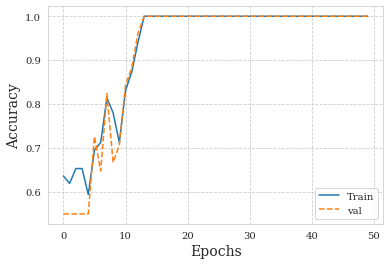

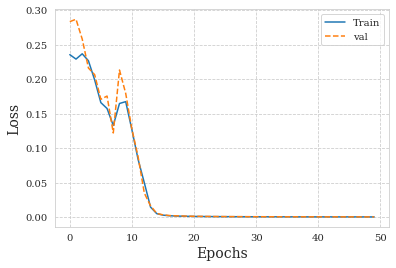

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=15,
                   restore_best_weights = True)

model = Sequential()
model.add(Dense(3, input_dim = X_MONK2_train.shape[1], activation="relu", kernel_initializer="random_normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1, momentum=0.1), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X2_train, y2_train, epochs=50, batch_size=2, validation_data=(X2_val, y2_val), verbose=0)#, callbacks=[es])

plot_score_loss(history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'])

In [ ]:
# finer-grained search for lr and momentum

model_search = KerasClassifier(build_fn, n_hidden_units=3, learning_rate=0, regularizer=L2, lambd=0, batch_size=2, momentum=0, epochs=50, random_state=42, verbose=1)

param_grid = {'learning_rate': [.2, .4, .6, .8, 1.],
              'momentum': [0, .1, .3, .5, .7, .9],
              }

search = GridSearchCV(model_search, 
                      param_grid, 
                      cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'neg_mean_squared_error')

search.fit(X_MONK2_train, y_MONK2_train, verbose=0)

print('Best score:', search.best_score_, '\nBest params', search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score: 0.0 
Best params {'learning_rate': 0.2, 'momentum': 0}


In [ ]:
scores_loss = search.cv_results_['mean_test_score']
params_loss = search.cv_results_['params']

grid_dict_loss = {}
for score, param in zip(scores_loss, params_loss):
    grid_dict_loss[str(param)] = score

optimal_model_loss = [(key, value) for key, value in grid_dict_loss.items() if value == 0]
for opt_model in optimal_model_loss:
  print(opt_model)

("{'learning_rate': 0.2, 'momentum': 0}", 0.0)
("{'learning_rate': 0.2, 'momentum': 0.1}", 0.0)
("{'learning_rate': 0.2, 'momentum': 0.3}", 0.0)
("{'learning_rate': 0.2, 'momentum': 0.5}", 0.0)
("{'learning_rate': 0.4, 'momentum': 0}", 0.0)
("{'learning_rate': 0.4, 'momentum': 0.1}", 0.0)
("{'learning_rate': 0.6, 'momentum': 0.5}", 0.0)
("{'learning_rate': 1.0, 'momentum': 0}", 0.0)
("{'learning_rate': 1.0, 'momentum': 0.1}", 0.0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


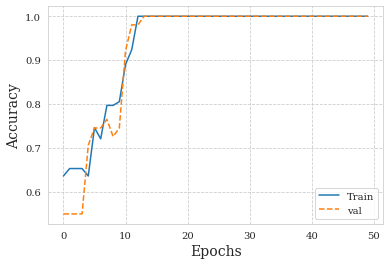

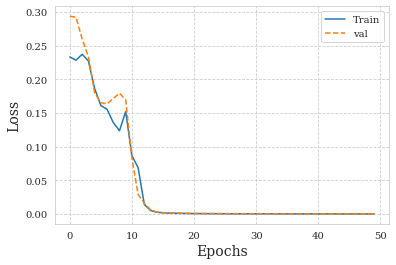

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(3, input_dim = X_MONK2_train.shape[1], activation="relu", kernel_initializer="random_normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.6, momentum=0.5), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X2_train, y2_train, epochs=50, batch_size=2, validation_data=(X2_val, y2_val), verbose=0)
plot_score_loss(history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'])

## **<font color="#CEFF5E">KERAS: COMPARING PARAMETERS</font>**

In [ ]:
accs_dict, losses_dict = begin_comparison("initializer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 2,
                                          epochs = 50, 
                                          input_unit = 3, 
                                          default_batch_size = 2,
                                          default_kernel_regularizer = L2(0),
                                          default_initializer = 'random_normal', 
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=0.6, momentum=0.5),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing initializer on MONK 2 

----------- initializer random_normal -----------
Percentual error: 22.529095
Avg accuracy:     0.764706
Acc std dev:      0.172281
Avg loss:         0.144209
Loss std dev:     0.101746 

----------- initializer random_uniform -----------
Percentual error: 22.871849
Avg accuracy:     0.737647
Acc std dev:      0.168714
Avg loss:         0.16543
Loss std dev:     0.103884 

----------- initializer he_normal -----------
Percentual error: 17.870404
Avg accuracy:     0.837647
Acc std dev:      0.149691
Avg loss:         0.106061
Loss std dev:     0.095855 

----------- initializer he_uniform -----------
Percentual error: 20.453548
Avg accuracy:     0.813726
Acc std dev:      0.166436
Avg loss:         0.116148
Loss std dev:     0.103201 

----------- initializer glorot_normal -----------
Percentual error: 19.118185
Avg accuracy:     0.858824
Acc std dev:      0.164191
Avg loss:         0.088409
Loss std dev:     0.103064 



(('random_normal', '7', '17'), 1.0)

In [ ]:
accs_dict, losses_dict = begin_comparison("activation_input", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 2,
                                          epochs = 50, 
                                          input_unit = 3, 
                                          default_batch_size = 2,
                                          default_kernel_regularizer = L2(0),
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=0.6, momentum=0.5),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing activation_input on MONK 2 

----------- activation_input relu -----------
Percentual error: 19.262384
Avg accuracy:     0.852941
Acc std dev:      0.164297
Avg loss:         0.092287
Loss std dev:     0.099096 

----------- activation_input selu -----------
Percentual error: 12.190586
Avg accuracy:     0.938431
Acc std dev:      0.1144
Avg loss:         0.0486
Loss std dev:     0.085759 

----------- activation_input sigmoid -----------
Percentual error: 2.958584
Avg accuracy:     0.994118
Acc std dev:      0.029412
Avg loss:         0.007466
Loss std dev:     0.026218 

----------- activation_input tanh -----------
Percentual error: 9.414637
Avg accuracy:     0.939608
Acc std dev:      0.088461
Avg loss:         0.047595
Loss std dev:     0.067135 



(('relu', '0', '66'), 1.0)

In [ ]:
accs_dict, losses_dict = begin_comparison("batch_size", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 2,
                                          epochs = 50, 
                                          input_unit = 3, 
                                          default_batch_size = 32,
                                          default_kernel_regularizer = L2(0),
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'sigmoid', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=0.6, momentum=0.5),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing batch_size on MONK 2 

----------- batch_size 1 -----------
Percentual error: 6.956536
Avg accuracy:     0.978431
Acc std dev:      0.068065
Avg loss:         0.017002
Loss std dev:     0.049026 

----------- batch_size 2 -----------
Percentual error: 6.925079
Avg accuracy:     0.98
Acc std dev:      0.067866
Avg loss:         0.018302
Loss std dev:     0.05415 

----------- batch_size 8 -----------
Percentual error: 17.983971
Avg accuracy:     0.700784
Acc std dev:      0.126029
Avg loss:         0.181007
Loss std dev:     0.058435 

----------- batch_size 32 -----------
Percentual error: 2.510237
Avg accuracy:     0.541177
Acc std dev:      0.013585
Avg loss:         0.253596
Loss std dev:     0.005948 

----------- batch_size 64 -----------
Percentual error: 1.23066
Avg accuracy:     0.548236
Acc std dev:      0.006747
Avg loss:         0.255382
Loss std dev:     0.00473 

----------- batch_size 128 -----------
Percentual error: 0.0
Avg accuracy:     0.54902
Acc std dev:  

((1, '0', '42'), 1.0)

In [ ]:
accs_dict, losses_dict = begin_comparison("optimizer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 2,
                                          epochs = 50, 
                                          input_unit = 3, 
                                          default_batch_size = 2,
                                          default_kernel_regularizer = L2(0),
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'sigmoid', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=0.6, momentum=0.5),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing optimizer on MONK 2 

----------- optimizer <class 'keras.optimizers.optimizer_v2.adam.Adam'> -----------
Percentual error: 6.355121
Avg accuracy:     0.535294
Acc std dev:      0.034019
Avg loss:         0.449142
Loss std dev:     0.056502 

----------- optimizer <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'> -----------
Percentual error: 1.650943
Avg accuracy:     0.997647
Acc std dev:      0.016471
Avg loss:         0.005764
Loss std dev:     0.017037 

----------- optimizer <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'> -----------
Percentual error: 21.793221
Avg accuracy:     0.766667
Acc std dev:      0.167081
Avg loss:         0.184346
Loss std dev:     0.130416 



((keras.optimizers.optimizer_v2.gradient_descent.SGD, '0', '87'), 1.0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


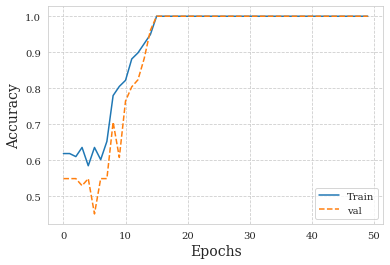

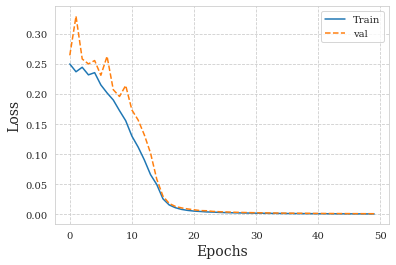

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(12)

model = Sequential()
model.add(Dense(3, input_dim = X_MONK2_train.shape[1], activation="sigmoid", kernel_initializer="he_normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="he_normal"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.8, momentum=0.5), loss='mse', metrics='accuracy') # learning rate increased for sigmoid
model.summary()

history = model.fit(X2_train, y2_train, epochs=50, batch_size=2, validation_data=(X2_val, y2_val), verbose=0)

plot_score_loss(history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'], save=1, name = 'MONK2_final')

In [ ]:
# iterating for get avg TR accuracy and loss

train_accs = []
train_losses = []

count = 0
list_seeds = np.random.default_rng().choice(50, size = 50, replace = False)      
for i in range(50):
    print(f"Processing {i + 1}/50")
    seed = list_seeds[i]
    keras.backend.clear_session()
    tf.random.set_seed(seed)

    model = Sequential()
    model.add(Dense(3, input_dim = X_MONK2_train.shape[1], activation="sigmoid", kernel_initializer="he_normal"))
    model.add(Dense(1, activation="sigmoid", kernel_initializer="he_normal"))
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.8, momentum=0.5), loss='mse', metrics='accuracy')    

    history = model.fit(X2_train, y2_train, epochs=50, batch_size=2, validation_data=(X2_val, y2_val), verbose=0)
    loss, acc = model.evaluate(X2_train, y2_train, verbose = 0)
    train_accs.append(acc)
    train_losses.append(loss)

print("Avg TR Accuracy:", np.mean(train_accs))
print("Std TR Accuracy:", np.std(train_accs))
print("Avg TR Loss:", np.mean(train_losses))
print("Std TR Loss:", np.std(train_losses))

Processing 1/50
Processing 2/50
Processing 3/50
Processing 4/50
Processing 5/50
Processing 6/50
Processing 7/50
Processing 8/50
Processing 9/50
Processing 10/50
Processing 11/50
Processing 12/50
Processing 13/50
Processing 14/50
Processing 15/50
Processing 16/50
Processing 17/50
Processing 18/50
Processing 19/50
Processing 20/50
Processing 21/50
Processing 22/50
Processing 23/50
Processing 24/50
Processing 25/50
Processing 26/50
Processing 27/50
Processing 28/50
Processing 29/50
Processing 30/50
Processing 31/50
Processing 32/50
Processing 33/50
Processing 34/50
Processing 35/50
Processing 36/50
Processing 37/50
Processing 38/50
Processing 39/50
Processing 40/50
Processing 41/50
Processing 42/50
Processing 43/50
Processing 44/50
Processing 45/50
Processing 46/50
Processing 47/50
Processing 48/50
Processing 49/50
Processing 50/50
Avg TR Accuracy: 0.9950847446918487
Std TR Accuracy: 0.02261870881710397
Avg TR Loss: 0.006016925981966779
Std TR Loss: 0.02104299576163404


In [ ]:
accs_dict, losses_dict = begin_comparison("testing", 
                                          iter = 50, 
                                          set_to_use = 'test',
                                          monk = 2,
                                          epochs = 50, 
                                          input_unit = 3, 
                                          default_batch_size = 2,
                                          default_initializer = 'he_normal', 
                                          default_act_input = 'sigmoid', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=0.7, momentum=0.5),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing testing on MONK 2 

----------- testing without comparison -----------
Percentual error: 4.084301
Avg accuracy:     0.989861
Acc std dev:      0.040429
Avg loss:         0.008579
Loss std dev:     0.03064 



(('without comparison', '0', '24'), 1.0)

### **<font color="#CEFF5E">SCIKITLEARN'S MLP</font>**

In [ ]:
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam", 
        "learning_rate_init": 0.02
    },
]

labels = [
    "constant learning w/o momentum",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning w/o momentum",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adaptive learning w/o momentum",
    "adaptive with momentum",
    "adaptive with Nesterov's momentum",
    "adam",
]

In [ ]:
# def plot_on_dataset(X, y, ax, name):
models = []
for label, param in zip(labels, params):
    print("training", label)
    mlp = MLPClassifier(random_state=42, max_iter=500, **param)

    # some parameter combinations will not converge so they are ignored here
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      mlp.fit(X2_train, y2_train)

    models.append(mlp)
    print("Score: %f" % mlp.score(X2_val, y2_val))
    print("Loss: %f" % mlp.loss_,'\n')

training constant learning w/o momentum
Score: 1.000000
Loss: 0.034365 

training constant with momentum
Score: 1.000000
Loss: 0.005307 

training constant with Nesterov's momentum
Score: 1.000000
Loss: 0.005276 

training inv-scaling learning w/o momentum
Score: 0.568627
Loss: 0.664605 

training inv-scaling with momentum
Score: 0.549020
Loss: 0.771488 

training inv-scaling with Nesterov's momentum
Score: 0.549020
Loss: 0.746906 

training adaptive learning w/o momentum
Score: 1.000000
Loss: 0.034365 

training adaptive with momentum
Score: 1.000000
Loss: 0.004517 

training adaptive with Nesterov's momentum
Score: 1.000000
Loss: 0.004559 

training adam
Score: 0.960784
Loss: 0.001746 



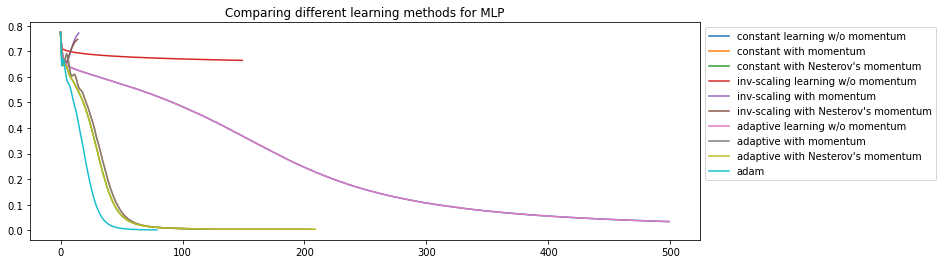

In [ ]:
plt.figure(figsize=(12,4))
for i, label in zip(range(len(models)), labels):
  plt.plot(models[i].loss_curve_, label = label)
plt.title("Comparing different learning methods for MLP")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

In [ ]:
model = MLPClassifier(solver = 'adam', 
                      max_iter = 50, 
                      # validation_fraction = 0.3,
                      # early_stopping = True,  
                      # n_iter_no_change = 10, 
                      random_state = 42)

param_grid = {'hidden_layer_sizes': [(1,), (2,), (4,), (6,), (8,), (2,2), (4,4)],
              'momentum': [.001, .01, .1], 
              'learning_rate_init': [.001, .01, 1],
              'batch_size': [1, 2, 4, 8],
              }

with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
  search = GridSearchCV(model, 
                        param_grid, 
                        cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                        verbose = 1).fit(X_MONK2_train, y_MONK2_train)
        
print('Best score:', search.best_score_)
print('Best params', search.best_estimator_) 

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best score: 1.0
Best params MLPClassifier(batch_size=1, hidden_layer_sizes=(2,), learning_rate_init=0.01,
              max_iter=50, momentum=0.001, random_state=42)


In [ ]:
model = MLPClassifier(solver = 'adam', 
                      max_iter = 50, 
                      validation_fraction = 0.3,
                      early_stopping = True,  
                      n_iter_no_change = 10, 
                      random_state = 42,
                      batch_size=1, 
                      hidden_layer_sizes=(2,), 
                      learning_rate_init=0.01,
                      momentum=0.001).fit(X_MONK2_train, y_MONK2_train)

print('Number of epochs:', len(model.loss_curve_))

Number of epochs: 23


Training score: 1.0
Validation score: 1.0 



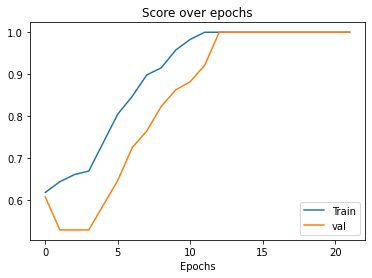

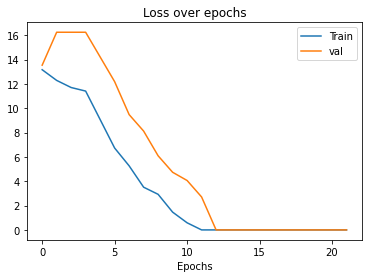

In [ ]:
max_iter = 22
mlp = MLPClassifier(solver='adam', 
                    random_state=42,
                    batch_size=1, 
                    hidden_layer_sizes=(2,), 
                    learning_rate_init=0.01,
                    momentum=0.001)

train_scores, train_loss, val_scores, val_loss = mlp_fit(mlp, max_iter, monk=2)

plot_score_loss(train_scores, val_scores, train_loss, val_loss)

In [ ]:
# Fitting final model to test set
mlp = MLPClassifier(solver = 'adam', 
                    max_iter = 23, 
                    random_state = 42,
                    batch_size=2, 
                    hidden_layer_sizes=(2,), 
                    learning_rate_init=0.01,
                    momentum=0.001)

mlp.fit(X_MONK2_train, y_MONK2_train)
y_pred = mlp.predict(X_MONK2_test)

print(classification_report(y_MONK2_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       290
           1     1.0000    1.0000    1.0000       142

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(


### **<font color="#CEFF5E">ASSESSING OTHER MODELS</font>**

In [ ]:
# Models, parameters and hyperparameters to test with nested cross validation for MONK 1
knn_params = ['n_neighbors', 'weights', 'metric']
knn_param_grid = [np.arange(2,54), ["uniform", "distance"], ["euclidean", "cityblock", "chebyshev"]]

dt_params = ['criterion', 'max_depth', 'min_samples_split']
dt_param_grid = [['gini', 'entropy'], range(2,108,2), range(2, 108,2)]

lr_params = ['solver', 'C', 'max_iter']
lr_param_grid = [['saga', 'lbfgs'], [.001, .1, 1, 10, 100], [500, 1000]]

rf_params = ['criterion', 'max_depth', 'n_estimators']
rf_param_grid = [['gini', 'entropy'], range(2,78,20), [100, 200, 300]]

bnb_params = ['alpha', 'binarize', 'fit_prior']
bnb_param_grid = [[.001, .01, .1, 1], [0], [True, False]]

gb_params = ['criterion', 'learning_rate', 'n_estimators']
gb_param_grid = [['friedman_mse', 'squared_error'], [.001, .01, .1, 1], [100, 200, 300]]

svc_params = ['C', 'kernel', 'gamma']
svc_param_grid = [[.1, 1, 100, 1000, 10000], ['poly', 'rbf', 'sigmoid'], [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]]

nested_dict = {
    #'K-Nearest Neighbors': [KNeighborsClassifier, knn_params, knn_param_grid],
    #'Decision Tree': [DecisionTreeClassifier, dt_params, dt_param_grid],
    #'Logistic Regression': [LogisticRegression, lr_params, lr_param_grid],
    #'Random Forests': [RandomForestClassifier, rf_params, rf_param_grid],
    #'Bernoulli Naive Bayes': [BernoulliNB, bnb_params, bnb_param_grid],
    #'Gradient Boosting': [GradientBoostingClassifier, gb_params, gb_param_grid],
    'Support Vector Machine': [SVC, svc_params, svc_param_grid]}

In [ ]:
monk = 2 # MONK set to use
print('MONK', monk, 'Nested Cross Validation results:\n')

# Ignoring convergence warning for logistic regression when max_iter is not enough to converge
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for name, [model_to_use, model_params, param_grid] in nested_dict.items():
        avg_acc, std_dev = nested_cross_validation(monk = monk, 
                                                   folds = 5,
                                                   model_to_use = model_to_use,
                                                   model_params = model_params,
                                                   param_grid = param_grid)
        print('------', name, '------')
        print('Average accuracy:  ', avg_acc)
        print('Standard deviation:', std_dev, '\n')

MONK 2 Nested Cross Validation results:

------ Support Vector Machine ------
Average accuracy:   0.8996
Standard deviation: 0.0822 



In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [0.001, 0.01, 0.1, 1.],
              'n_estimators':[100, 1000, 10000]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK2_train, y_MONK2_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.7338680926916222 {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, criterion='friedman_mse')
gbc.fit(X_MONK2_train, y_MONK2_train)
predictions = gbc.predict(X2_test)
print(classification_report(y2_test, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       290
         1.0       0.62      0.76      0.68       142

    accuracy                           0.77       432
   macro avg       0.74      0.77      0.75       432
weighted avg       0.79      0.77      0.77       432



### **<font color="#CEFF5E">SVM</font>**

GridSearch 1st run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 2nd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ["rbf", "poly", "sigmoid"], #default = rbf
    'class_weight': ['balanced', None],
    'C': [5000, 6000, 7000, 8000, 10000, 11000, 12000, 13000, 14000, 15000], #default=1.0
    'gamma': [.005, .006, .007, .008, .009, .01, .02, .03, .04, .05], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.000005, .000006, .000007, .000008, .000009, 1e-5, .00002, .00003, .00004, .00005], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 3rd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced', None],
    'C': [9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400], #default=1.0
    'gamma': [.0006, .0007, .0008, .0009, .008, .0081, .0082, .0083, .0084], #default: auto
    # 'random_state': [0]
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

In [ ]:
# Testing best parameters on test set
svc = SVC(C=9600, gamma=0.008) 
svc.fit(X_MONK2_train, y_MONK2_train)

y_pred = svc.predict(X_MONK2_test)

print(accuracy_score(y_MONK2_test, y_pred))
print(classification_report(y_MONK2_test, y_pred, digits = 4))

## **<font color="#CEFF5E">SCIKITLEARN'S MLP</font>**

In [ ]:
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam", 
        "learning_rate_init": 0.02
    },
]

labels = [
    "constant learning w/o momentum",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning w/o momentum",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adaptive learning w/o momentum",
    "adaptive with momentum",
    "adaptive with Nesterov's momentum",
    "adam",
]

In [ ]:
# def plot_on_dataset(X, y, ax, name):
models = []
for label, param in zip(labels, params):
    print("training", label)
    mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(6,), **param)

    # some parameter combinations will not converge so they are ignored here
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      mlp.fit(X2_train, y2_train)

    models.append(mlp)
    print("Score: %f" % mlp.score(X2_val, y2_val))
    print("Loss: %f" % mlp.loss_,'\n')

training constant learning w/o momentum
Score: 0.843137
Loss: 0.171128 

training constant with momentum
Score: 0.980392
Loss: 0.009723 

training constant with Nesterov's momentum
Score: 1.000000
Loss: 0.008588 

training inv-scaling learning w/o momentum
Score: 0.411765
Loss: 0.693606 

training inv-scaling with momentum
Score: 0.549020
Loss: 0.638519 

training inv-scaling with Nesterov's momentum
Score: 0.549020
Loss: 0.638263 

training adaptive learning w/o momentum
Score: 0.843137
Loss: 0.171128 

training adaptive with momentum
Score: 0.980392
Loss: 0.008742 

training adaptive with Nesterov's momentum
Score: 1.000000
Loss: 0.007825 

training adam
Score: 1.000000
Loss: 0.004425 



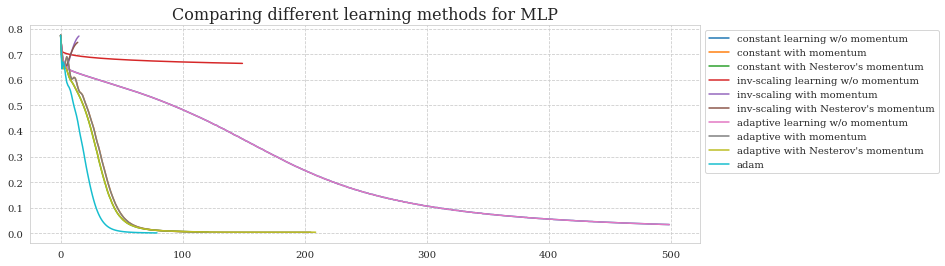

In [ ]:
plt.figure(figsize=(12,4))
for i, label in zip(range(len(models)), labels):
  plt.plot(models[i].loss_curve_, label = label)
plt.title("Comparing different learning methods for MLP")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

In [ ]:
# Gridsearch to find optimal values for neural network
model = MLPClassifier(solver = 'adam', 
                      max_iter = 50)

param_grid = {'hidden_layer_sizes': [(2,), (4,), (6,)],
              'momentum': [0, .001, .01, .1], 
              'learning_rate_init': [.001, .01, 1],
              'batch_size': [1, 2, 8, 32],
              }

with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      search = GridSearchCV(model, 
                            param_grid, 
                            cv = StratifiedKFold(5, shuffle = True, random_state = 42), 
                            verbose = 1).fit(X_MONK2_train, y_MONK2_train)
        
print('Best score:', search.best_score_)
print('Best params', search.best_estimator_) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best score: 1.0
Best params MLPClassifier(batch_size=1, hidden_layer_sizes=(6,), learning_rate_init=0.01,
              max_iter=50, momentum=0.1)


Training score:   1.0
Validation score: 1.0
Training loss:    0.0
Validation loss:  0.0 



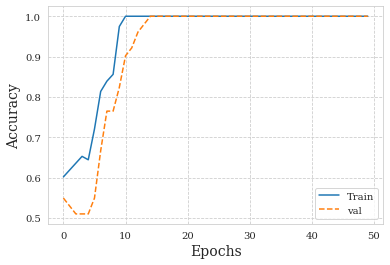

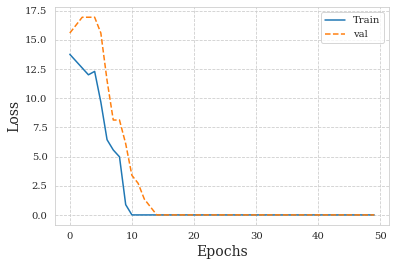

In [ ]:
# Visualizing training curves for model found in gridsearch
mlp = MLPClassifier(solver = 'adam',
                    max_iter = 50,
                    batch_size=1, 
                    hidden_layer_sizes=(6,), 
                    learning_rate_init=0.01,
                    momentum=0.1,
                    random_state=42)

train_scores, train_loss, val_scores, val_loss = mlp_fit(mlp, max_iter = 50, monk=2)

plot_score_loss(train_scores = train_scores, 
                val_scores = val_scores, 
                train_loss = train_loss,
                val_loss = val_loss,
                save = 1,
                name = 'MONK2_sklearn')

In [ ]:
iterations = 50
list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

train_acc = []
val_acc = []
test_acc = []

train_loss = []
val_loss = []
test_loss = []

for i in list_seeds:
    tr_acc, vl_acc, ts_acc, tr_loss, vl_loss, ts_loss = mlp_final_test(mlp=MLPClassifier(solver = 'adam',
                                                                                         max_iter = 50,
                                                                                         batch_size=1, 
                                                                                         hidden_layer_sizes=(6,), 
                                                                                         learning_rate_init=0.01,
                                                                                         momentum=0.1,
                                                                                         random_state=i), epochs=50, monk=2)
    train_acc.append(tr_acc)
    val_acc.append(vl_acc)
    test_acc.append(ts_acc)

    train_loss.append(tr_loss)
    val_loss.append(vl_loss)
    test_loss.append(ts_loss)

print('Avg train acc: ', round(np.mean(train_acc),4))
print('Std dev:       ', round(np.std(train_acc),4))
print('Avg val acc:   ', round(np.mean(val_acc),4))
print('Std dev:       ', round(np.std(val_acc),4))
print('Avg test acc:  ', round(np.mean(test_acc),4))
print('Std dev:       ', round(np.std(test_acc),4))

print('Avg train loss:', round(np.mean(train_loss),4))
print('Std dev:       ', round(np.std(train_loss),4))
print('Avg val loss:  ', round(np.mean(val_loss),4))
print('Std dev:       ', round(np.std(val_loss),4))
print('Avg test loss: ', round(np.mean(test_loss),4))
print('Std dev:       ', round(np.std(test_loss),4))

Avg train acc:  0.999
Std dev:        0.0071
Avg val acc:    0.9902
Std dev:        0.0549
Avg test acc:   0.9918
Std dev:        0.0433
Avg train loss: 0.0351
Std dev:        0.2459
Avg val loss:   0.3386
Std dev:        1.8975
Avg test loss:  0.283
Std dev:        1.4961


## **<font color="#CEFF5E">NESTED CROSS VALIDATION</font>**

In [ ]:
# Models, parameters and hyperparameters to test with nested cross validation for MONK 1
knn_params = ['n_neighbors', 'weights', 'metric']
knn_param_grid = [range(2,108,2), ["uniform", "distance"], ["euclidean", "cityblock", "chebyshev"]]

dt_params = ['criterion', 'max_depth', 'min_samples_split']
dt_param_grid = [['gini', 'entropy'], [1, 2, 4, 6, 8, 10, None], [2, 3, 4, 5, 6, 7, 8]]

lr_params = ['solver', 'C', 'max_iter']
lr_param_grid = [['saga', 'lbfgs'], [.0001, .001, .1, 1, 10, 100, 1000], [500, 1000]]

rf_params = ['criterion', 'max_depth', 'n_estimators']
rf_param_grid = [['gini', 'entropy'], [1, 3, 5, 7, 10, None], [50, 100, 150, 200]]

bnb_params = ['alpha', 'binarize', 'fit_prior']
bnb_param_grid = [[.0001, .001, .01, .1, 1], [0], [True, False]]

gb_params = ['criterion', 'learning_rate', 'n_estimators']
gb_param_grid = [['friedman_mse', 'squared_error'], [.001, .01, .1, 1], [50, 100, 150, 200]]

svc_params = ['C', 'kernel', 'gamma']
svc_param_grid = [[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], 
                  ['poly', 'rbf', 'sigmoid'], 
                  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5]]

nested_dict = {
    'K-Nearest Neighbors': [KNeighborsClassifier, knn_params, knn_param_grid],
    'Decision Tree': [DecisionTreeClassifier, dt_params, dt_param_grid],
    'Logistic Regression': [LogisticRegression, lr_params, lr_param_grid],
    'Random Forests': [RandomForestClassifier, rf_params, rf_param_grid],
    'Bernoulli Naive Bayes': [BernoulliNB, bnb_params, bnb_param_grid],
    'Gradient Boosting': [GradientBoostingClassifier, gb_params, gb_param_grid],
    'Support Vector Machine': [SVC, svc_params, svc_param_grid]}

In [ ]:
monk = 2 # MONK set to use
print('MONK', monk, 'Nested Cross Validation results:\n')

# Ignoring convergence warning for logistic regression when max_iter is not enough to converge
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for name, [model_to_use, model_params, param_grid] in nested_dict.items():
        avg_acc, std_dev = nested_cross_validation(monk = monk, 
                                                   folds = 5,
                                                   model_to_use = model_to_use,
                                                   model_params = model_params,
                                                   param_grid = param_grid)
        print('------', name, '------')
        print('Average accuracy:  ', avg_acc)
        print('Standard deviation:', std_dev, '\n')

MONK 2 Nested Cross Validation results:

------ K-Nearest Neighbors ------
Average accuracy:   0.6504
Standard deviation: 0.1059 

------ Decision Tree ------
Average accuracy:   0.6337
Standard deviation: 0.0516 

------ Logistic Regression ------
Average accuracy:   0.621
Standard deviation: 0.1019 

------ Random Forests ------
Average accuracy:   0.621
Standard deviation: 0.0588 

------ Bernoulli Naive Bayes ------
Average accuracy:   0.5909
Standard deviation: 0.1113 

------ Gradient Boosting ------
Average accuracy:   0.6269
Standard deviation: 0.0971 

------ Support Vector Machine ------
Average accuracy:   0.8526
Standard deviation: 0.1683 



### **<font color="#CEFF5E">SVM</font>**

GridSearch 1st run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 2nd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ["rbf", "poly", "sigmoid"], #default = rbf
    'class_weight': ['balanced', None],
    'C': [5000, 6000, 7000, 8000, 10000, 11000, 12000, 13000, 14000, 15000], #default=1.0
    'gamma': [.005, .006, .007, .008, .009, .01, .02, .03, .04, .05], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.000005, .000006, .000007, .000008, .000009, 1e-5, .00002, .00003, .00004, .00005], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 3rd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced', None],
    'C': [9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400], #default=1.0
    'gamma': [.0006, .0007, .0008, .0009, .008, .0081, .0082, .0083, .0084], #default: auto
    # 'random_state': [0]
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK2_train, y_MONK2_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

In [ ]:
# Testing best parameters on validation set
svc = SVC(C=9600, gamma=0.008) 
svc.fit(X2_train, y2_train)

y_pred = svc.predict(X2_val)
print(classification_report(y2_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y2_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        28
           1     1.0000    1.0000    1.0000        23

    accuracy                         1.0000        51
   macro avg     1.0000    1.0000    1.0000        51
weighted avg     1.0000    1.0000    1.0000        51

AUC: 1.0


In [ ]:
# Testing best parameters on test set
svc = SVC(C=9600, gamma=0.008) 
svc.fit(X_MONK2_train, y_MONK2_train)

y_pred = svc.predict(X2_test)
print(classification_report(y2_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y2_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       290
         1.0     1.0000    1.0000    1.0000       142

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432

AUC: 1.0


### **<font color="#CEFF5E">GRADIENT BOOSTING</font>**

In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [0.001, 0.01, 0.1, 1.],
              'n_estimators':[50, 100, 200]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK2_train, y_MONK2_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.7338680926916222 {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [.5, 7, 1, 1.2, 1.5],
              'n_estimators':[50, 100, 200]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK2_train, y_MONK2_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.7401069518716578 {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'n_estimators': 200}


In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [.3, .4, .5, .6],
              'n_estimators':[150, 175, 200, 225, 250]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK2_train, y_MONK2_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.7520499108734403 {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'n_estimators': 250}


In [ ]:
# Testing on validation set
gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=.5, criterion='friedman_mse')
gbc.fit(X2_train, y2_train)

y_pred = gbc.predict(X2_val)

print(classification_report(y2_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y2_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.6667    0.7143    0.6897        28
           1     0.6190    0.5652    0.5909        23

    accuracy                         0.6471        51
   macro avg     0.6429    0.6398    0.6403        51
weighted avg     0.6452    0.6471    0.6451        51

AUC: 0.6398


In [ ]:
# Testing on test set
gbc = GradientBoostingClassifier(n_estimators=250, learning_rate=.5, criterion='friedman_mse')
gbc.fit(X_MONK2_train, y_MONK2_train)

y_pred = gbc.predict(X2_test)

print(classification_report(y2_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y_MONK2_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     0.8783    0.7966    0.8354       290
         1.0     0.6509    0.7746    0.7074       142

    accuracy                         0.7894       432
   macro avg     0.7646    0.7856    0.7714       432
weighted avg     0.8036    0.7894    0.7934       432

AUC: 0.7856


### **<font color="#CEFF5E">RANDOM FORESTS</font>**

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 7, 10, None],
              'n_estimators': [50, 100, 150, 200]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK2_train, y_MONK2_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.7042780748663102 {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}


In [ ]:
param_grid = {'criterion': ['gini'],
              'max_depth': [1, 3, 5, 7, 10, None],
              'n_estimators': [80, 90, 100, 110, 120, 130]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK2_train, y_MONK2_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.7042780748663102 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 110}


In [ ]:
# Testing on validation set
rf = RandomForestClassifier(n_estimators=110)
rf.fit(X2_train, y2_train)

y_pred = rf.predict(X2_val)

print(classification_report(y2_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y2_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.6111    0.7857    0.6875        28
           1     0.6000    0.3913    0.4737        23

    accuracy                         0.6078        51
   macro avg     0.6056    0.5885    0.5806        51
weighted avg     0.6061    0.6078    0.5911        51

AUC: 0.5885


In [ ]:
# Testing on test set
rf = RandomForestClassifier(n_estimators=110)
rf.fit(X_MONK2_train, y_MONK2_train)

y_pred = rf.predict(X2_test)

print(classification_report(y2_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y2_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     0.8259    0.7690    0.7964       290
         1.0     0.5864    0.6690    0.6250       142

    accuracy                         0.7361       432
   macro avg     0.7062    0.7190    0.7107       432
weighted avg     0.7472    0.7361    0.7401       432

AUC: 0.719


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    rf = RandomForestClassifier(n_estimators=110, random_state = i)
    rf.fit(X_MONK2_train, y_MONK2_train)

    y_pred = rf.predict(X_MONK2_test)

    acc = accuracy_score(y_MONK2_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK2_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

Avg Accuracy:   0.7431
std dev:        0.0122
AUC:            0.7118
std dev:        0.0124


# **<font color="#34ebdb">5.0 MONK 3</font>**

## **<font color="#CEFF5E">KERAS</font>**

In [ ]:
model_search = KerasClassifier(build_fn, n_hidden_units=0, learning_rate=0, regularizer=L2, lambd=0, batch_size=0, momentum=0, epochs=50, random_state=42, verbose=0)

param_grid = {'n_hidden_units': [2, 4, 6],
              'learning_rate': [.01, .1, 1],
              'momentum': [0, .01, .1],
              'lambd': [0, .01, .1],
              'batch_size': [2, 8, 32]
              }

search_loss = GridSearchCV(model_search, 
                           param_grid, 
                           cv = StratifiedKFold(5, shuffle=True, random_state=42), 
                           verbose = 0,
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error').fit(X_MONK3_train, y_MONK3_train, verbose=0)

print('Best score:', search_loss.best_score_, '\nBest params', search_loss.best_params_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: -0.06566666666666666 
Best params {'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0, 'n_hidden_units': 2}


In [ ]:
scores_loss = search_loss.cv_results_['mean_test_score']
params_loss = search_loss.cv_results_['params']

grid_dict_loss = {}
for score, param in zip(scores_loss, params_loss):
    grid_dict_loss[str(param)] = score

optimal_model_loss = [(key, value) for key, value in grid_dict_loss.items() if value > -.07]
for opt_model in optimal_model_loss:
  print(opt_model)

("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0, 'n_hidden_units': 2}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0, 'n_hidden_units': 4}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0, 'n_hidden_units': 6}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0.01, 'n_hidden_units': 2}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0.01, 'n_hidden_units': 4}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0.01, 'n_hidden_units': 6}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0.1, 'n_hidden_units': 2}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate': 0.1, 'momentum': 0.1, 'n_hidden_units': 4}", -0.06566666666666666)
("{'batch_size': 2, 'lambd': 0.01, 'learning_rate':

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Validation accuracy: 0.9459
Validation loss:     0.0702


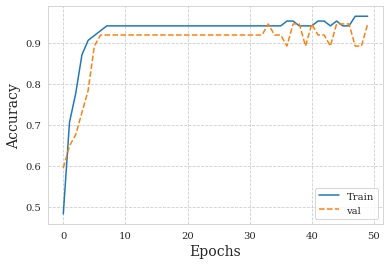

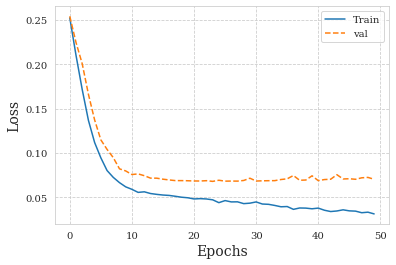

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(0), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1, momentum=0), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X3_train, y3_train, epochs=50, batch_size=2, validation_data=(X3_val, y3_val), verbose=0)

loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X3_val, y3_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 1,
                name = 'MONK3_noreg')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Validation accuracy: 0.9189
Validation loss:     0.0999


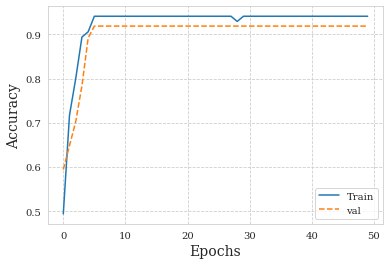

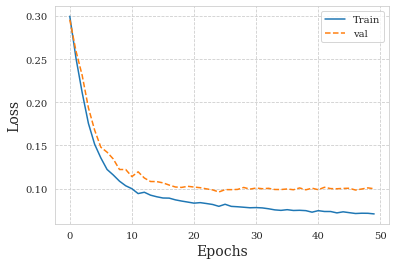

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(.01), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1, momentum=0), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X3_train, y3_train, epochs=50, batch_size=2, validation_data=(X3_val, y3_val), verbose=0)

loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X3_val, y3_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 1,
                name = 'MONK3_reg')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Validation accuracy: 0.9189
Validation loss:     0.1094


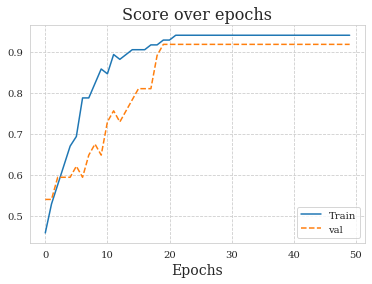

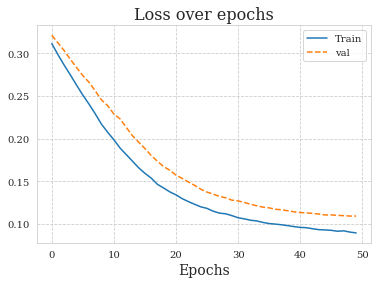

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(.01), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1, momentum=0), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X3_train, y3_train, epochs=50, batch_size=8, validation_data=(X3_val, y3_val), verbose=0)

loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X3_val, y3_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 0,
                name = '')

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(.01), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1, momentum=0), loss='mse', metrics='accuracy')

model.fit(X3_train, y3_train, epochs=30, batch_size=2, verbose=0)

predictions = model.predict(X3_val)
y_pred = get_pred(predictions)

print(classification_report(y3_val, y_pred, digits = 4))

14/14 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0     0.9444    1.0000    0.9714       204
         1.0     1.0000    0.9474    0.9730       228

    accuracy                         0.9722       432
   macro avg     0.9722    0.9737    0.9722       432
weighted avg     0.9738    0.9722    0.9722       432



## **<font color="#CEFF5E">KERAS: COMPARING PARAMETERS</font>**

In [ ]:
accs_dict, losses_dict = begin_comparison("initializer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 2,
                                          default_initializer = 'glorot_normal', 
                                          default_kernel_regularizer = L2(.01),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=.1, momentum=0),
                                          learning_rate = 1,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing initializer on MONK 3 

----------- initializer random_normal -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.1081
Loss std dev:     0.006251 

----------- initializer random_uniform -----------
Percentual error: 1.237477
Avg accuracy:     0.917297
Acc std dev:      0.011351
Avg loss:         0.107868
Loss std dev:     0.007338 

----------- initializer he_normal -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.107854
Loss std dev:     0.006021 

----------- initializer he_uniform -----------
Percentual error: 0.588235
Avg accuracy:     0.918919
Acc std dev:      0.005405
Avg loss:         0.109169
Loss std dev:     0.006272 

----------- initializer glorot_normal -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.10812
Loss std dev:     0.004662 



(('he_uniform', '21', '77'), 0.945946)

In [ ]:
accs_dict, losses_dict = begin_comparison("optimizer", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 2,
                                          default_initializer = 'random_normal', 
                                          default_kernel_regularizer = L2(.01),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = SGD(learning_rate=.1, momentum=0),
                                          learning_rate = .01,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing optimizer on MONK 3 

----------- optimizer <class 'keras.optimizers.optimizer_v2.adam.Adam'> -----------
Percentual error: 1.126255
Avg accuracy:     0.915676
Acc std dev:      0.010313
Avg loss:         0.103545
Loss std dev:     0.008734 

----------- optimizer <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'> -----------
Percentual error: 3.868587
Avg accuracy:     0.897838
Acc std dev:      0.034734
Avg loss:         0.172724
Loss std dev:     0.024583 

----------- optimizer <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'> -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.092273
Loss std dev:     0.004843 



((keras.optimizers.optimizer_v2.adam.Adam, '0', '45'), 0.918919)

In [ ]:
accs_dict, losses_dict = begin_comparison("activation_input", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 2,
                                          default_initializer = 'random_normal', 
                                          default_kernel_regularizer = L2(.01),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = RMSprop(learning_rate=.01),
                                          learning_rate = .01,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing activation_input on MONK 3 

----------- activation_input relu -----------
Percentual error: 1.155418
Avg accuracy:     0.916757
Acc std dev:      0.010592
Avg loss:         0.095357
Loss std dev:     0.007564 

----------- activation_input selu -----------
Percentual error: 1.808161
Avg accuracy:     0.914595
Acc std dev:      0.016537
Avg loss:         0.093607
Loss std dev:     0.010581 

----------- activation_input sigmoid -----------
Percentual error: 2.260517
Avg accuracy:     0.912433
Acc std dev:      0.020626
Avg loss:         0.160208
Loss std dev:     0.00949 

----------- activation_input tanh -----------
Percentual error: 4.557371
Avg accuracy:     0.909189
Acc std dev:      0.041435
Avg loss:         0.097019
Loss std dev:     0.020234 



(('relu', '0', '46'), 0.918919)

In [ ]:
accs_dict, losses_dict = begin_comparison("batch_size", 
                                          iter = 50, 
                                          set_to_use = 'val',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 2,
                                          default_initializer = 'random_normal', 
                                          default_kernel_regularizer = L2(.01),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = RMSprop(learning_rate=.01),
                                          learning_rate = .01,
                                          plot = 0)

max(accs_dict.items(), key=lambda x: x[1]) 

comparing batch_size on MONK 3 

----------- batch_size 1 -----------
Percentual error: 6.285166
Avg accuracy:     0.909189
Acc std dev:      0.057144
Avg loss:         0.091836
Loss std dev:     0.024136 

----------- batch_size 2 -----------
Percentual error: 0.412007
Avg accuracy:     0.918378
Acc std dev:      0.003784
Avg loss:         0.091909
Loss std dev:     0.005665 

----------- batch_size 8 -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.102203
Loss std dev:     0.006469 

----------- batch_size 32 -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.11814
Loss std dev:     0.007151 

----------- batch_size 64 -----------
Percentual error: 0.0
Avg accuracy:     0.918919
Acc std dev:      0.0
Avg loss:         0.127113
Loss std dev:     0.012575 

----------- batch_size 128 -----------
Percentual error: 1.474925
Avg accuracy:     0.916216
Acc std dev:      0.013514
Avg lo

((1, '0', '26'), 0.918919)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Validation accuracy: 0.9189
Validation loss:     0.0899


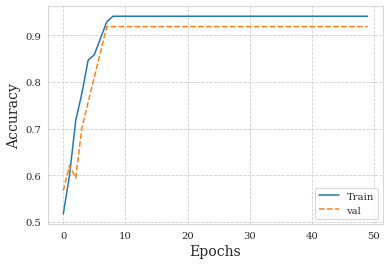

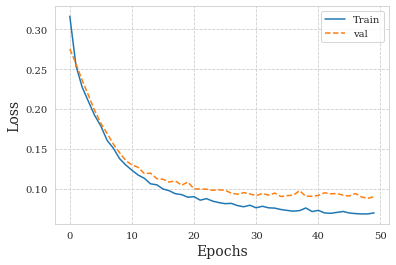

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(285)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(.01), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.01), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X3_train, y3_train, epochs=50, batch_size=8, validation_data=(X3_val, y3_val), verbose=0)

loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X3_val, y3_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save = 1,
                name = 'MONK3_final')

In [ ]:
# iterating for get avg TR accuracy and loss

train_accs = []
train_losses = []

count = 0
list_seeds = np.random.default_rng().choice(50, size = 50, replace = False)      
for i in range(50):
    print(f"Processing {i + 1}/50")
    seed = list_seeds[i]
    keras.backend.clear_session()
    tf.random.set_seed(seed)

    model = Sequential()
    model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(.01), activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.01), loss='mse', metrics='accuracy')

    history = model.fit(X3_train, y3_train, epochs=50, batch_size=8, validation_data=(X3_val, y3_val), verbose=0)
    loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
    train_accs.append(acc)
    train_losses.append(loss)

print("Avg TR Accuracy:", np.mean(train_accs))
print("Std TR Accuracy:", np.std(train_accs))
print("Avg TR Loss:", np.mean(train_losses))
print("Std TR Loss:", np.std(train_losses))

Processing 1/50
Processing 2/50
Processing 3/50
Processing 4/50
Processing 5/50
Processing 6/50
Processing 7/50
Processing 8/50
Processing 9/50
Processing 10/50
Processing 11/50
Processing 12/50
Processing 13/50
Processing 14/50
Processing 15/50
Processing 16/50
Processing 17/50
Processing 18/50
Processing 19/50
Processing 20/50
Processing 21/50
Processing 22/50
Processing 23/50
Processing 24/50
Processing 25/50
Processing 26/50
Processing 27/50
Processing 28/50
Processing 29/50
Processing 30/50
Processing 31/50
Processing 32/50
Processing 33/50
Processing 34/50
Processing 35/50
Processing 36/50
Processing 37/50
Processing 38/50
Processing 39/50
Processing 40/50
Processing 41/50
Processing 42/50
Processing 43/50
Processing 44/50
Processing 45/50
Processing 46/50
Processing 47/50
Processing 48/50
Processing 49/50
Processing 50/50
Avg TR Accuracy: 0.9538823556900025
Std TR Accuracy: 0.00843128084671243
Avg TR Loss: 0.057294023111462596
Std TR Loss: 0.005621280414101305


comparing testing on MONK 3 

----------- testing without comparison -----------
Percentual error: 0.188698
Avg accuracy:     0.971805
Acc std dev:      0.001834
Avg loss:         0.052269
Loss std dev:     0.006113 


******************* testing without comparison ACCURACY *******************



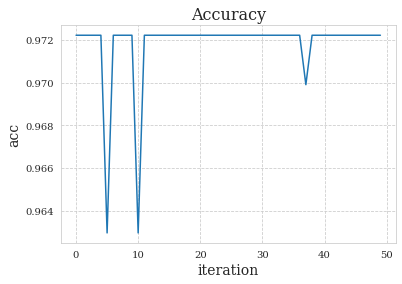


******************* testing without comparison LOSS *******************



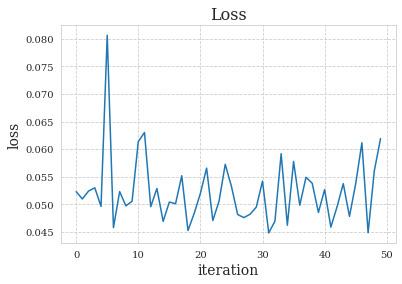

In [ ]:
accs_dict, losses_dict = begin_comparison("testing", 
                                          iter = 50, 
                                          set_to_use = 'test',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 8,
                                          default_initializer = 'random_normal', 
                                          default_kernel_regularizer = L2(.01),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = RMSprop(learning_rate=.01),
                                          learning_rate = .01,
                                          plot = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
Training accuracy:   1.0
Training loss:       0.0046
Validation accuracy: 0.9189
Validation loss:     0.0622


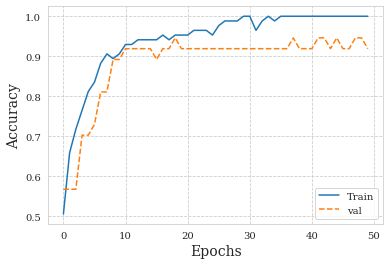

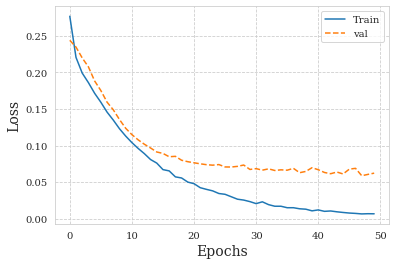

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(285)

model = Sequential()
model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(0), activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.01), loss='mse', metrics='accuracy')
model.summary()

history = model.fit(X3_train, y3_train, epochs=50, batch_size=8, validation_data=(X3_val, y3_val), verbose=0)

loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
print('Training accuracy:  ', round(acc,4))
print('Training loss:      ', round(loss,4))

loss_val, acc_val = model.evaluate(X3_val, y3_val, verbose = 0)
print('Validation accuracy:', round(acc_val,4))
print('Validation loss:    ', round(loss_val,4))

plot_score_loss(train_scores = history.history['accuracy'], 
                val_scores = history.history['val_accuracy'], 
                train_loss = history.history['loss'], 
                val_loss = history.history['val_loss'],
                save=0, name='MONK3_nonr')

In [ ]:
# iterating for get avg TR accuracy and loss

train_accs = []
train_losses = []

count = 0
list_seeds = np.random.default_rng().choice(50, size = 50, replace = False)      
for i in range(50):
    print(f"Processing {i + 1}/50")
    seed = list_seeds[i]
    keras.backend.clear_session()
    tf.random.set_seed(seed)

    model = Sequential()
    model.add(Dense(4, input_dim = X_MONK3_train.shape[1], kernel_regularizer = L2(0), activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.01), loss='mse', metrics='accuracy')

    history = model.fit(X3_train, y3_train, epochs=50, batch_size=8, validation_data=(X3_val, y3_val), verbose=0)
    loss, acc = model.evaluate(X3_train, y3_train, verbose = 0)
    train_accs.append(acc)
    train_losses.append(loss)

print("Avg TR Accuracy:", np.mean(train_accs))
print("Std TR Accuracy:", np.std(train_accs))
print("Avg TR Loss:", np.mean(train_losses))
print("Std TR Loss:", np.std(train_losses))

Processing 1/50
Processing 2/50
Processing 3/50
Processing 4/50
Processing 5/50
Processing 6/50
Processing 7/50
Processing 8/50
Processing 9/50
Processing 10/50
Processing 11/50
Processing 12/50
Processing 13/50
Processing 14/50
Processing 15/50
Processing 16/50
Processing 17/50
Processing 18/50
Processing 19/50
Processing 20/50
Processing 21/50
Processing 22/50
Processing 23/50
Processing 24/50
Processing 25/50
Processing 26/50
Processing 27/50
Processing 28/50
Processing 29/50
Processing 30/50
Processing 31/50
Processing 32/50
Processing 33/50
Processing 34/50
Processing 35/50
Processing 36/50
Processing 37/50
Processing 38/50
Processing 39/50
Processing 40/50
Processing 41/50
Processing 42/50
Processing 43/50
Processing 44/50
Processing 45/50
Processing 46/50
Processing 47/50
Processing 48/50
Processing 49/50
Processing 50/50
Avg TR Accuracy: 0.9929411768913269
Std TR Accuracy: 0.011036271718242032
Avg TR Loss: 0.010998235670849682
Std TR Loss: 0.006867759058792491


comparing testing on MONK 3 

----------- testing without comparison -----------
Percentual error: 1.33138
Avg accuracy:     0.960926
Acc std dev:      0.012794
Avg loss:         0.034312
Loss std dev:     0.009624 


******************* testing without comparison ACCURACY *******************



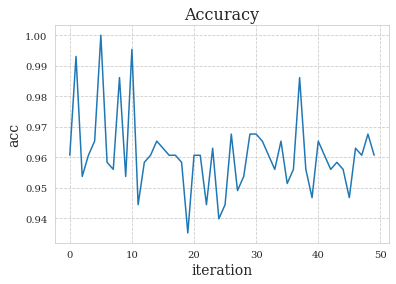


******************* testing without comparison LOSS *******************



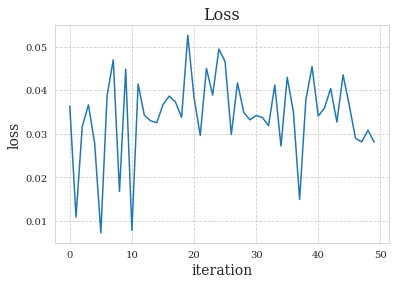

In [ ]:
accs_dict, losses_dict = begin_comparison("testing", 
                                          iter = 50, 
                                          set_to_use = 'test',
                                          monk = 3,
                                          epochs = 30, 
                                          input_unit = 4, 
                                          default_batch_size = 8,
                                          default_initializer = 'random_normal', 
                                          default_kernel_regularizer = L2(0),
                                          default_act_input = 'relu', 
                                          default_act_output = 'sigmoid', 
                                          default_optimizer = RMSprop(learning_rate=.01),
                                          learning_rate = 1,
                                          plot = 1)

## **<font color="#CEFF5E">SCIKITLEARN'S MLP</font>**

In [ ]:
# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "momentum": 0,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "adaptive",
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "adam", 
        "learning_rate_init": 0.02
    },
]

labels = [
    "constant learning w/o momentum",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning w/o momentum",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adaptive learning w/o momentum",
    "adaptive with momentum",
    "adaptive with Nesterov's momentum",
    "adam",
]

In [ ]:
# def plot_on_dataset(X, y, ax, name):
models = []
for label, param in zip(labels, params):
    print("training", label)
    mlp = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(6,), **param)

    # some parameter combinations will not converge so they are ignored here
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      mlp.fit(X3_train, y3_train)

    models.append(mlp)
    print("Score: %f" % mlp.score(X3_val, y3_val))
    print("Loss: %f" % mlp.loss_,'\n')

training constant learning w/o momentum
Score: 0.918919
Loss: 0.092431 

training constant with momentum
Score: 0.918919
Loss: 0.130229 

training constant with Nesterov's momentum
Score: 0.945946
Loss: 0.008373 

training inv-scaling learning w/o momentum
Score: 0.513514
Loss: 0.740651 

training inv-scaling with momentum
Score: 0.810811
Loss: 0.412125 

training inv-scaling with Nesterov's momentum
Score: 0.810811
Loss: 0.410203 

training adaptive learning w/o momentum
Score: 0.918919
Loss: 0.092431 

training adaptive with momentum
Score: 0.918919
Loss: 0.129176 

training adaptive with Nesterov's momentum
Score: 0.945946
Loss: 0.007855 

training adam
Score: 0.891892
Loss: 0.060608 



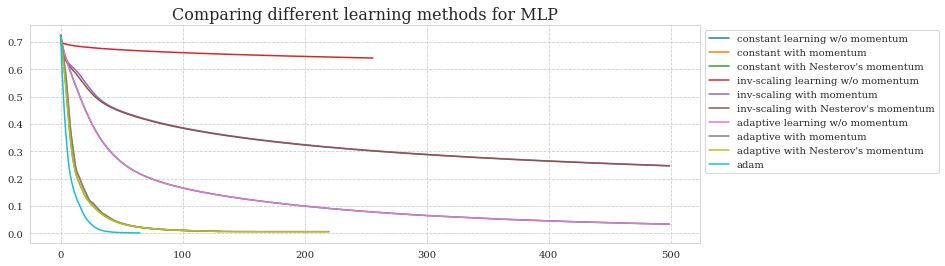

In [ ]:
plt.figure(figsize=(12,4))
for i, label in zip(range(len(models)), labels):
    plt.plot(models[i].loss_curve_, label = label)
plt.title("Comparing different learning methods for MLP")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

In [ ]:
# Gridsearch to find optimal values for neural network
model = MLPClassifier(solver = 'adam', 
                      max_iter = 50, 
                      random_state = 42)

param_grid = {'hidden_layer_sizes': [(2,), (4,), (6,)],
              'momentum': [0, .001, .01, .1], 
              'learning_rate_init': [.001, .01, 1],
              'batch_size': [1, 2, 8, 32],
              }

with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      search = GridSearchCV(model, 
                            param_grid, 
                            cv = StratifiedKFold(5, shuffle = True, random_state = 42), 
                            verbose = 1).fit(X_MONK3_train, y_MONK3_train)
        
print('Best score:', search.best_score_)
print('Best params', search.best_estimator_) 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best score: 0.9346666666666668
Best params MLPClassifier(batch_size=8, hidden_layer_sizes=(2,), learning_rate_init=0.01,
              max_iter=50, momentum=0, random_state=42)


Training score:   0.9529
Validation score: 0.9189
Training loss:    1.6254
Validation loss:  2.8005 



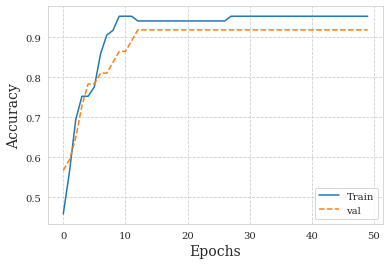

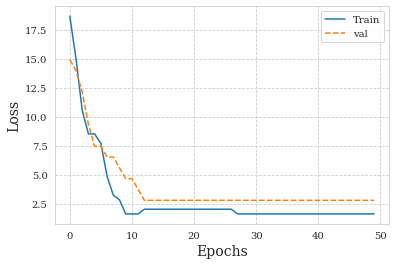

In [ ]:
# Visualizing training curves for model found in gridsearch
mlp = MLPClassifier(solver = 'adam', 
                    random_state = 42,
                    max_iter = 50,
                    batch_size=8, 
                    hidden_layer_sizes=(2,), 
                    learning_rate_init=0.01,
                    momentum=0)

train_scores, train_loss, val_scores, val_loss = mlp_fit(mlp, max_iter = 50, monk=3)

plot_score_loss(train_scores = train_scores, 
                val_scores = val_scores, 
                train_loss = train_loss,
                val_loss = val_loss,
                save = 0,
                name = '')

In [ ]:
iterations = 50
list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

train_acc = []
val_acc = []
test_acc = []

train_loss = []
val_loss = []
test_loss = []

for i in list_seeds:
    tr_acc, vl_acc, ts_acc, tr_loss, vl_loss, ts_loss = mlp_final_test(mlp=MLPClassifier(solver = 'adam', 
                                                                                         random_state = i,
                                                                                         max_iter = 50,
                                                                                         batch_size=8, 
                                                                                         hidden_layer_sizes=(2,), 
                                                                                         learning_rate_init=0.01,
                                                                                         momentum=0), epochs=50, monk=3)
    train_acc.append(tr_acc)
    val_acc.append(vl_acc)
    test_acc.append(ts_acc)

    train_loss.append(tr_loss)
    val_loss.append(vl_loss)
    test_loss.append(ts_loss)

print('Avg train acc: ', round(np.mean(train_acc),4))
print('Std dev:       ', round(np.std(train_acc),4))
print('Avg val acc:   ', round(np.mean(val_acc),4))
print('Std dev:       ', round(np.std(val_acc),4))
print('Avg test acc:  ', round(np.mean(test_acc),4))
print('Std dev:       ', round(np.std(test_acc),4))

print('Avg train loss:', round(np.mean(train_loss),4))
print('Std dev:       ', round(np.std(train_loss),4))
print('Avg val loss:  ', round(np.mean(val_loss),4))
print('Std dev:       ', round(np.std(val_loss),4))
print('Avg test loss: ', round(np.mean(test_loss),4))
print('Std dev:       ', round(np.std(test_loss),4))

Avg train acc:  0.9624
Std dev:        0.0149
Avg val acc:    0.9173
Std dev:        0.0126
Avg test acc:   0.9692
Std dev:        0.0114
Avg train loss: 1.3003
Std dev:        0.514
Avg val loss:   2.8565
Std dev:        0.4342
Avg test loss:  1.0649
Std dev:        0.3931


## **<font color="#CEFF5E">NESTED CROSS VALIDATION</font>**

In [ ]:
# Models, parameters and hyperparameters to test with nested cross validation for MONK 1
knn_params = ['n_neighbors', 'weights', 'metric']
knn_param_grid = [range(2,78,2), ["uniform", "distance"], ["euclidean", "cityblock", "chebyshev"]]

dt_params = ['criterion', 'max_depth', 'min_samples_split']
dt_param_grid = [['gini', 'entropy'], [1, 2, 4, 6, 8, 10, None], [2, 3, 4, 5, 6, 7, 8]]

lr_params = ['solver', 'C', 'max_iter']
lr_param_grid = [['saga', 'lbfgs'], [.0001, .001, .1, 1, 10, 100, 1000], [500, 1000]]

rf_params = ['criterion', 'max_depth', 'n_estimators']
rf_param_grid = [['gini', 'entropy'], [1, 3, 5, 7, 10, None], [50, 100, 150, 200]]

bnb_params = ['alpha', 'binarize', 'fit_prior']
bnb_param_grid = [[.0001, .001, .01, .1, 1], [0], [True, False]]

gb_params = ['criterion', 'learning_rate', 'n_estimators']
gb_param_grid = [['friedman_mse', 'squared_error'], [.001, .01, .1, 1], [50, 100, 150, 200]]

svc_params = ['C', 'kernel', 'gamma']
svc_param_grid = [[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], 
                  ['poly', 'rbf', 'sigmoid'], 
                  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5]]

nested_dict = {
    'K-Nearest Neighbors': [KNeighborsClassifier, knn_params, knn_param_grid],
    'Decision Tree': [DecisionTreeClassifier, dt_params, dt_param_grid],
    'Logistic Regression': [LogisticRegression, lr_params, lr_param_grid],
    'Random Forests': [RandomForestClassifier, rf_params, rf_param_grid],
    'Bernoulli Naive Bayes': [BernoulliNB, bnb_params, bnb_param_grid],
    'Gradient Boosting': [GradientBoostingClassifier, gb_params, gb_param_grid],
    'Support Vector Machine': [SVC, svc_params, svc_param_grid]}

In [ ]:
monk = 3 # MONK set to use
print('MONK', monk, 'Nested Cross Validation results:\n')

# Ignoring convergence warning for logistic regression when max_iter is not enough to converge
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    for name, [model_to_use, model_params, param_grid] in nested_dict.items():
        avg_acc, std_dev = nested_cross_validation(monk = monk, 
                                                   folds = 5,
                                                   model_to_use = model_to_use,
                                                   model_params = model_params,
                                                   param_grid = param_grid)
        print('------', name, '------')
        print('Average accuracy:  ', avg_acc)
        print('Standard deviation:', std_dev, '\n')

MONK 3 Nested Cross Validation results:

------ K-Nearest Neighbors ------
Average accuracy:   0.8523
Standard deviation: 0.0566 

------ Decision Tree ------
Average accuracy:   0.934
Standard deviation: 0.0423 

------ Logistic Regression ------
Average accuracy:   0.926
Standard deviation: 0.0314 

------ Random Forests ------
Average accuracy:   0.918
Standard deviation: 0.0571 

------ Bernoulli Naive Bayes ------
Average accuracy:   0.934
Standard deviation: 0.0423 

------ Gradient Boosting ------
Average accuracy:   0.9177
Standard deviation: 0.0377 

------ Support Vector Machine ------
Average accuracy:   0.934
Standard deviation: 0.0423 



### **<font color="#CEFF5E">SVM</font>**

GridSearch 1st run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK3_train, y_MONK3_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 2nd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [.5, .6, .7, .8, .9, 1, 2, 3, 4, 5 ], #default=1.0
    'gamma': [.01, .02, .03, .04, .05, .07, .08, .09, .1], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.01, .02, .03, .04, .05, .07, .08, .09, .1], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK3_train, y_MONK3_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

GridSearch 3rd run

In [ ]:
model_svc = SVC()

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['poly', 'rbf', 'sigmoid'], #default = rbf
    'class_weight': ['balanced', None],
    'C': [.05, .06, .07, .08, .09, .1,  .2, .3, .4, .5], #default=1.0
    'gamma': [.1], #default: auto
    }

svc_param_grid_linear = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    'kernel': ['linear'],
    'class_weight': ['balanced', None],
    'C': [.065, .066, .067, .068, .069, .070, .071, .072, .073, .074, .075], #default=1.0
    }

models_params = {
    'SVM': [model_svc, svc_param_grid],
    'SVMlinear': [model_svc, svc_param_grid_linear]
    }

best_params = {}
validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv = KFold(10, shuffle=True, random_state=42), 
                          verbose=2, 
                          n_jobs = -1).fit(X_MONK3_train, y_MONK3_train)
    best_params[name] = search.best_estimator_
    validation_scores[name] = search.best_score_
    print('Best score: ', validation_scores[name])
    print('Best parameters: ', best_params[name], '\n')

In [ ]:
# Testing best parameters on validation set
svc = SVC(C=0.5, class_weight='balanced', gamma=0.1).fit(X3_train, y3_train) 

y_pred = svc.predict(X3_val)
print(classification_report(y3_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y3_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.9091    0.5263    0.6667        19
           1     0.6538    0.9444    0.7727        18

    accuracy                         0.7297        37
   macro avg     0.7815    0.7354    0.7197        37
weighted avg     0.7849    0.7297    0.7183        37

AUC: 0.7354


In [ ]:
# Testing best parameters (linear) on validation set
svc = SVC(C=0.065, class_weight='balanced', kernel='linear').fit(X3_train, y3_train) 

y_pred = svc.predict(X3_val)
print(classification_report(y3_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y3_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.9333    0.7368    0.8235        19
           1     0.7727    0.9444    0.8500        18

    accuracy                         0.8378        37
   macro avg     0.8530    0.8406    0.8368        37
weighted avg     0.8552    0.8378    0.8364        37

AUC: 0.8406


In [ ]:
# Testing best parameters on test set
svc = SVC(C=0.065, class_weight='balanced', kernel='linear').fit(X_MONK3_train, y_MONK3_train) 

y_pred = svc.predict(X_MONK3_test)
print(classification_report(y_MONK3_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y_MONK3_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.9444    1.0000    0.9714       204
           1     1.0000    0.9474    0.9730       228

    accuracy                         0.9722       432
   macro avg     0.9722    0.9737    0.9722       432
weighted avg     0.9738    0.9722    0.9722       432

AUC: 0.9737


### **<font color="#CEFF5E">GRADIENT BOOSTING</font>**

In [ ]:
param_grid = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate': [0.001, 0.01, 0.1, 1.],
              'n_estimators':[50, 100, 200]}

search = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      cv=StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy').fit(X_MONK3_train, y_MONK3_train)
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9266666666666665 {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 100}


In [ ]:
# Testing on validation set
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, criterion='friedman_mse')
gbc.fit(X3_train, y3_train)

y_pred = gbc.predict(X3_val)

print(classification_report(y3_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y3_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.9444    0.8947    0.9189        19
           1     0.8947    0.9444    0.9189        18

    accuracy                         0.9189        37
   macro avg     0.9196    0.9196    0.9189        37
weighted avg     0.9203    0.9189    0.9189        37

AUC: 0.9196


In [ ]:
# Testing on test set
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, criterion='friedman_mse')
gbc.fit(X_MONK3_train, y_MONK3_train)

y_pred = gbc.predict(X3_test)

print(classification_report(y3_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y_MONK3_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       204
         1.0     1.0000    1.0000    1.0000       228

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432

AUC: 1.0


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = .01, criterion = 'friedman_mse', random_state = i)
    gbc.fit(X_MONK3_train, y_MONK3_train)

    y_pred = gbc.predict(X_MONK3_test)

    acc = accuracy_score(y_MONK3_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK3_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

Avg Accuracy:   1.0
std dev:        0.0
AUC:            1.0
std dev:        0.0


### **<font color="#CEFF5E">RANDOM FORESTS</font>**

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 7, 10, None],
              'n_estimators': [50, 100, 150, 200]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK3_train, y_MONK3_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.9426666666666665 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


In [ ]:
param_grid = {'criterion': ['gini'],
              'max_depth': [None],
              'n_estimators': [200, 250, 300]}

search = GridSearchCV(RandomForestClassifier(),
                      param_grid,
                      cv = StratifiedKFold(5, shuffle=True, random_state=42),
                      verbose = 1,
                      n_jobs = -1,
                      scoring = 'accuracy').fit(X_MONK3_train, y_MONK3_train)
                      
print(search.best_score_, search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.9343333333333333 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 250}


In [ ]:
# Testing on validation set
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X3_train, y3_train)

y_pred = rf.predict(X3_val)

print(classification_report(y3_val, y_pred, digits = 4))

auc_score = round(roc_auc_score(y3_val, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

           0     0.9474    0.9474    0.9474        19
           1     0.9444    0.9444    0.9444        18

    accuracy                         0.9459        37
   macro avg     0.9459    0.9459    0.9459        37
weighted avg     0.9459    0.9459    0.9459        37

AUC: 0.9459


In [ ]:
# Testing on test set
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_MONK3_train, y_MONK3_train)

y_pred = rf.predict(X3_test)

print(classification_report(y3_test, y_pred, digits = 4))

auc_score = round(roc_auc_score(y3_test, y_pred),4)
print('AUC:', auc_score)

              precision    recall  f1-score   support

         0.0     0.9312    0.9951    0.9621       204
         1.0     0.9953    0.9342    0.9638       228

    accuracy                         0.9630       432
   macro avg     0.9633    0.9647    0.9629       432
weighted avg     0.9650    0.9630    0.9630       432

AUC: 0.9647


In [ ]:
# Fitting final model to test set and evaluating it over n iterations to get mean score
iterations = 50
accuracy = []
auc = []

list_seeds = np.random.default_rng().choice(iterations, size = iterations, replace = False)      

for i in list_seeds:
    rf = RandomForestClassifier(n_estimators=250, random_state = i)
    rf.fit(X_MONK3_train, y_MONK3_train)

    y_pred = rf.predict(X_MONK3_test)

    acc = accuracy_score(y_MONK3_test, y_pred)
    accuracy.append(acc)
    auc_score = roc_auc_score(y_MONK3_test, y_pred)
    auc.append(auc_score)

print('Avg Accuracy:  ', round(np.mean(accuracy),4))
print('std dev:       ', round(np.std(accuracy),4))
print('AUC:           ', round(np.mean(auc),4))
print('std dev:       ', round(np.std(auc),4))

Avg Accuracy:   0.9626
std dev:        0.0012
AUC:            0.9643
std dev:        0.0011
